# Задание 1

Добавляем библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

Создаём функцию для вывода текста

In [2]:
def format_complex_exp(z):
    amplitude = abs(z)
    phase = cmath.phase(z)*180/np.pi
    return f"{amplitude:.10f} * e^({phase:.2f})"

Задаём постоянные и переменные

In [3]:
e = 2.7182818284590452353602874713526624977572
V_l = 127
Z_ph1 = 3 + 9j
Z_ph2 = -6j
V_ph = V_l/(3)**0.5
EA = V_ph * e**(0j)
EB = V_ph * e**(-120j*np.pi/180)
EC = V_ph * e**(120j*np.pi/180)
EA_angle = np.angle(EA)
EB_angle = np.angle(EB)
EC_angle = np.angle(EC)

Считаем напряжения

In [4]:
print(format_complex_exp(EA))
print(format_complex_exp(EB))
print(format_complex_exp(EC))

73.3234841871 * e^(0.00)
73.3234841871 * e^(-120.00)
73.3234841871 * e^(120.00)


In [5]:
Volatage_input = {
    '$E_{A}$': {'magnitude': abs(EA), 'angle': np.angle(EA), 'color': 'orange'},
    '$E_{B}$': {'magnitude': abs(EB), 'angle': np.angle(EB), 'color': 'green'},
    '$E_{C}$': {'magnitude': abs(EC), 'angle': np.angle(EC), 'color': 'red'},
}

In [6]:
def create_vector_diagram_text(dict_name):
    start_point_x = 0
    start_point_y = 0


    for name, params in dict_name.items():
        magnitude = params['magnitude']
        angle = params['angle']
        color = params['color']

        # Построение вектора
        plt.quiver(start_point_x, start_point_y, magnitude * np.cos(angle), magnitude * np.sin(angle),
                  angles='xy', scale_units='xy', scale=1, color=color, label=name)

        # Подпись вектора в его конечной точке
        end_x = start_point_x + magnitude * np.cos(angle) / 2
        end_y = start_point_y + magnitude * np.sin(angle) / 2 + 5
        plt.text(end_x, end_y, name, ha='right', va='bottom', color="black")

        # Обновление начальной точки для следующего вектора
        start_point_x += magnitude * np.cos(angle)
        start_point_y += magnitude * np.sin(angle)

In [7]:
def create_vector_diagram_no_text(dict_name):
    start_point_x = 0
    start_point_y = 0


    for name, params in dict_name.items():
        magnitude = params['magnitude']
        angle = params['angle']
        color = params['color']

        # Построение вектора
        plt.quiver(start_point_x, start_point_y, magnitude * np.cos(angle), magnitude * np.sin(angle),
                  angles='xy', scale_units='xy', scale=1, color=color, label=name)

        # Обновление начальной точки для следующего вектора
        start_point_x += magnitude * np.cos(angle)
        start_point_y += magnitude * np.sin(angle)

Для проверки строим график

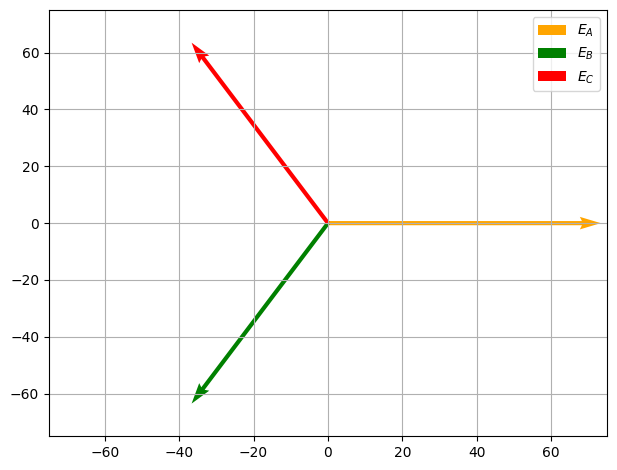

In [8]:
plt.quiver(0, 0, abs(EA) *np.cos(EA_angle), abs(EA) *np.sin(EA_angle), angles='xy', scale_units='xy', scale=1,
           color='orange',
           label='$E_A$')
plt.quiver(0, 0, abs(EB) *np.cos(EB_angle), abs(EB) *np.sin(EB_angle), angles='xy', scale_units='xy', scale=1,
           color='green',
           label='$E_B$')
plt.quiver(0, 0, abs(EC) *np.cos(EC_angle), abs(EC) *np.sin(EC_angle), angles='xy', scale_units='xy', scale=1,
           color='red',
           label='$E_C$')


plt.tight_layout()
plt.legend()
plt.xlim(-75, 75) # предел по x откуда и до куда
plt.ylim(-75, 75) # предел по y
plt.grid()

Теперь построим из конца напряжений

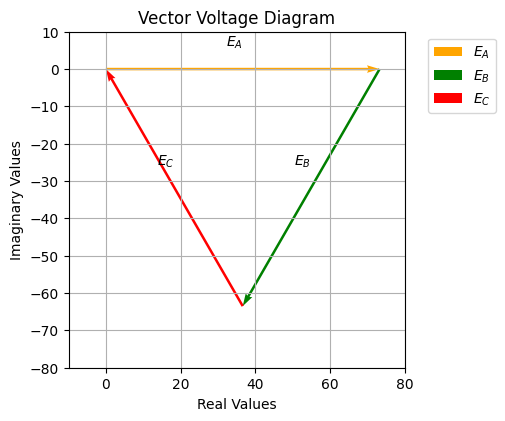

In [9]:
create_vector_diagram_text(Volatage_input)

plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-10, 80)
plt.ylim(-80, 10)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Расчёт тока в эквивалентной звезде \
$
\dot{I}_{A} = \dfrac{\dot{E_{A}}}{\underline{Z_{n2}}} \\
\dot{I}_{B} = \dfrac{\dot{E_{B}}}{\underline{Z_{n2}}} \\
\dot{I}_{C} = \dfrac{\dot{E_{C}}}{\underline{Z_{n2}}}
$

Рассчитываем токи

In [10]:
I_A = EA/(2.3-3.6j)
I_B = EB/(2.3-3.6j)
I_C = EC/(2.3-3.6j)

In [37]:
print(format_complex_exp(I_A))
print(format_complex_exp(I_B))
print(format_complex_exp(I_C))

17.1637294113 * e^(57.43)
17.1637294113 * e^(-62.57)
17.1637294113 * e^(177.43)


In [12]:
Currents_input = {
    '$I_{A}$': {'magnitude': abs(I_A), 'angle': np.angle(I_A), 'color': 'orange'},
    '$I_{B}$': {'magnitude': abs(I_B), 'angle': np.angle(I_B), 'color': 'green'},
    '$I_{C}$': {'magnitude': abs(I_C), 'angle': np.angle(I_C), 'color': 'red'},
}

Для проверки строим

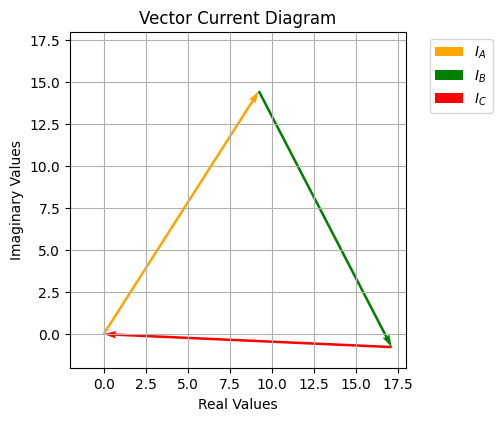

In [13]:
create_vector_diagram_no_text(Currents_input)

plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Current Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-2, 18)
plt.ylim(-2, 18)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Ток одинаковый как на $\underline{Z_{l}}$ так и на $\underline{Z_{n1}}$ \
Поэтому посчитаем напряжение на $\underline{Z_{n1}}$ \
$
\dot{U}_{an1} = \dot{I_A} \cdot \underline{Z_{n1}} \\
\dot{U}_{bn1} = \dot{I_B} \cdot \underline{Z_{n1}} \\
\dot{U}_{cn1} = \dot{I_C} \cdot \underline{Z_{n1}} \\
$

In [14]:
Z_n1 = 2 - 4j
Z_l = 0.3 + 0.4j

U_an1 = I_A * Z_n1
U_bn1 = I_B * Z_n1
U_cn1 = I_C * Z_n1

U_an1l = I_A * Z_l
U_bn1l = I_B * Z_l
U_cn1l = I_C * Z_l

In [15]:
Voltages_abcn = {
    '$U_{an1}$': {'magnitude': abs(U_an1), 'angle': np.angle(U_an1), 'color': 'darkorange'},
    '$U_{an1l}$': {'magnitude': abs(U_an1l), 'angle': np.angle(U_an1l), 'color': 'tan'},
    '$U_{bn1}$': {'magnitude': abs(U_bn1), 'angle': np.angle(U_bn1), 'color': 'darkolivegreen'},
    '$U_{bn1l}$': {'magnitude': abs(U_bn1l), 'angle': np.angle(U_bn1l), 'color': 'lime'},
    '$U_{cn1}$': {'magnitude': abs(U_cn1), 'angle': np.angle(U_cn1), 'color': 'darkred'},
    '$U_{cn1l}$': {'magnitude': abs(U_cn1l), 'angle': np.angle(U_cn1l), 'color': 'lightcoral'},
}

Voltages_abcnl = {
    '$U_{an1l}$': {'magnitude': abs(U_an1l), 'angle': np.angle(U_an1l), 'color': 'orange'},
    '$U_{bn1l}$': {'magnitude': abs(U_bn1l), 'angle': np.angle(U_bn1l), 'color': 'green'},
    '$U_{cn1l}$': {'magnitude': abs(U_cn1l), 'angle': np.angle(U_cn1l), 'color': 'red'},
}

Построим векторную диаграмму для проверки

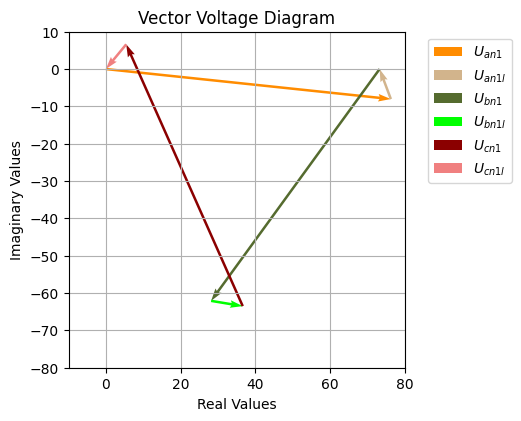

In [16]:
create_vector_diagram_no_text(Voltages_abcn)


plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-10, 80)
plt.ylim(-80, 10)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

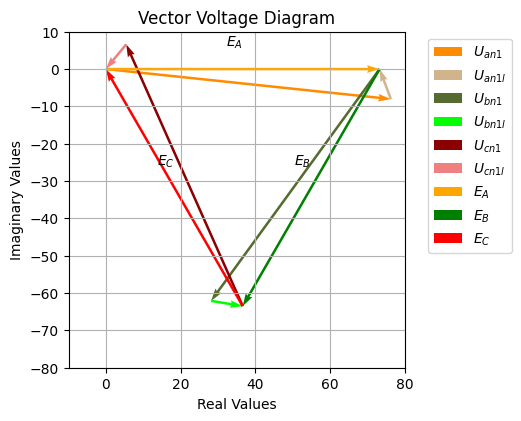

In [17]:
create_vector_diagram_no_text(Voltages_abcn)
create_vector_diagram_text(Volatage_input)


plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-10, 80)
plt.ylim(-80, 10)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Как видим всё верно, теперь мы знаем напряжение на эквивалентных участках цепи звезды

Теперь найдём напряжение между точками a и b \
Воспользуемся вторым законом Кирхгофа \
$
\dot{U}_{ab} - \dot{I}_B \cdot \underline{Z_l} + \dot{I}_A \cdot \underline{Z_l} = \dot{E}_A - \dot{E}_B ⇒ \\
\dot{U}_{ab} = \dot{E}_A - \dot{E}_B + \dot{I}_B \cdot \underline{Z_l} - \dot{I}_A \cdot \underline{Z_l}$ \
$
\dot{U}_{bc} - \dot{I}_C \cdot \underline{Z_l} + \dot{I}_B \cdot \underline{Z_l} = \dot{E}_B - \dot{E}_C ⇒ \\
\dot{U}_{bc} = \dot{E}_B - \dot{E}_C + \dot{I}_C \cdot \underline{Z_l} - \dot{I}_B \cdot \underline{Z_l} \\
\dot{U}_{ca} - \dot{I}_A \cdot \underline{Z_l} + \dot{I}_C \cdot \underline{Z_l} = \dot{E}_C - \dot{E}_A ⇒ \\
\dot{U}_{ca} = \dot{E}_C - \dot{E}_A + \dot{I}_A \cdot \underline{Z_l} - \dot{I}_C \cdot \underline{Z_l}
$

$
\dot{U}_{ab} = \dot{E}_A - \dot{E}_B + \dot{I}_B \cdot \underline{Z_l} - \dot{I}_A \cdot \underline{Z_l} \\
\dot{U}_{bc} = \dot{E}_B - \dot{E}_C + \dot{I}_C \cdot \underline{Z_l} - \dot{I}_B \cdot \underline{Z_l} \\
\dot{U}_{ca} = \dot{E}_C - \dot{E}_A + \dot{I}_A \cdot \underline{Z_l} - \dot{I}_C \cdot \underline{Z_l}
$ \\
Теперь посчитаем

In [18]:
U_ab = EA - EB + I_B * Z_l - I_A * Z_l
U_bc = EB - EC + I_C * Z_l - I_B * Z_l
U_ca = EC - EA + I_A * Z_l - I_C * Z_l

In [19]:
Voltages_triangle = {
    '$U_{ab}$': {'magnitude': abs(U_ab), 'angle': np.angle(U_ab), 'color': 'orange'},
    '$U_{bc}$': {'magnitude': abs(U_bc), 'angle': np.angle(U_bc), 'color': 'green'},
    '$U_{ca}$': {'magnitude': abs(U_ca), 'angle': np.angle(U_ca), 'color': 'red'},
}

Построим диаграмму, чтобы посмотреть что получилось

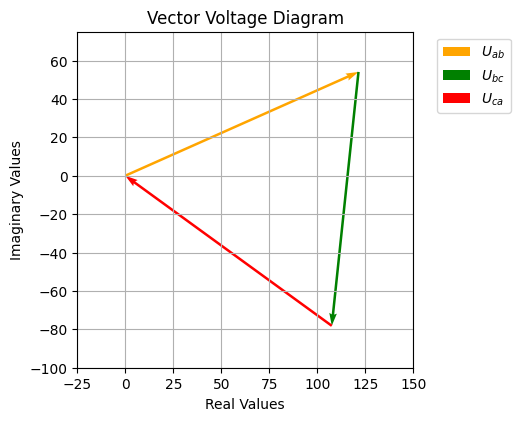

In [20]:
create_vector_diagram_no_text(Voltages_triangle)

plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-25, 150)
plt.ylim(-100, 75)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Теперь, зная напряжение между точками в треугольнгике, вернёмся к двум треугольникам и посчитаем токи и напряжения по закону Ома \
Для фаз приёмника #1 ($\underline{Z_{ph_1}} = 3 + 9j$) \
И фаз приёмника #2 ($\underline{Z_{ph_2}} = -6j$) \
$
\dot{I}_{ab1} = \dfrac{\dot{U}_{ab}}{Z_{ph1}} \\
\dot{I}_{ab2} = \dfrac{\dot{U}_{ab}}{Z_{ph2}} \\
\dot{I}_{bc1} = \dfrac{\dot{U}_{bc}}{Z_{ph1}} \\
\dot{I}_{bc2} = \dfrac{\dot{U}_{bc}}{Z_{ph2}} \\
\dot{I}_{ca1} = \dfrac{\dot{U}_{ca}}{Z_{ph1}} \\
\dot{I}_{ca2} = \dfrac{\dot{U}_{ca}}{Z_{ph2}} \\
$

In [21]:
I_ab1 = U_ab / Z_ph1
I_ab2 = U_ab / Z_ph2

I_bc1 = U_bc / Z_ph1
I_bc2 = U_bc / Z_ph2

I_ca1 = U_ca / Z_ph1
I_ca2 = U_ca / Z_ph2

Выполним проверку токов по первому закону Кирхгофа \
$
\dot{I}_A = \dot{I}_{ab1} + \dot{I}_{ab2} -\dot{I}_{ca1} - \dot{I}_{ca2}\\
\dot{I}_B = -\dot{I}_{ab1} - \dot{I}_{ab2} + \dot{I}_{bc1} + \dot{I}_{bc2}\\
\dot{I}_C = \dot{I}_{ca1} + \dot{I}_{ca2} - \dot{I}_{bc1} - \dot{I}_{bc2}  
$

In [22]:
print(I_A)
print(I_ab1 + I_ab2 - I_ca1 - I_ca2)
print(I_B)
print(-I_ab1 - I_ab2 + I_bc1 + I_bc2)
print(I_C)
print(I_ca1 + I_ca2 - I_bc1 - I_bc2)

(9.240767870152858+14.463810579369692j)
(9.240767870152858+14.46381057936969j)
(7.905643462183847-15.23464501571224j)
(7.905643462183848-15.234645015712243j)
(-17.1464113323367+0.7708344363425532j)
(-17.146411332336704+0.7708344363425517j)


Построим диаграмму для этих соотношений

In [23]:
Currents = {
    '$I_{ab1}$': {'magnitude': abs(I_ab1), 'angle': np.angle(I_ab1), 'color': 'peru'},
    '$I_{ab2}$': {'magnitude': abs(I_ab2), 'angle': np.angle(I_ab2), 'color': 'gold'},
    '$-I_{ca1}$': {'magnitude': abs(I_ca1), 'angle': np.angle(-I_ca1), 'color': 'khaki'},
    '$-I_{ca2}$': {'magnitude': abs(I_ca2), 'angle': np.angle(-I_ca2), 'color': 'darkorange'},
    '$I_{bc1}$': {'magnitude': abs(I_bc1), 'angle': np.angle(I_bc1), 'color': 'lime'},
    '$I_{bc2}$': {'magnitude': abs(I_bc2), 'angle': np.angle(I_bc2), 'color': 'springgreen'},
    '$-I_{ab1}$': {'magnitude': abs(I_ab1), 'angle': np.angle(-I_ab1), 'color': 'lightgreen'},
    '$-I_{ab2}$': {'magnitude': abs(I_ab2), 'angle': np.angle(-I_ab2), 'color': 'forestgreen'},
    '$I_{ca1}$': {'magnitude': abs(I_ca1), 'angle': np.angle(I_ca1), 'color': 'lightcoral'},
    '$I_{ca2}$': {'magnitude': abs(I_ca2), 'angle': np.angle(I_ca2), 'color': 'darkred'},
    '$-I_{bc1}$': {'magnitude': abs(I_bc1), 'angle': np.angle(-I_bc1), 'color': 'tomato'},
    '$-I_{bc2}$': {'magnitude': abs(I_bc2), 'angle': np.angle(-I_bc2), 'color': 'brown'},
}

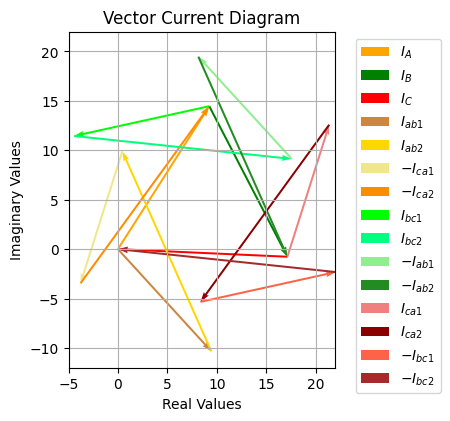

In [24]:
create_vector_diagram_no_text(Currents_input)
create_vector_diagram_no_text(Currents)



plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Current Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-5, 22)
plt.ylim(-12, 22)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

In [25]:
CurrentsA = {
    '$I_{ab1}$': {'magnitude': abs(I_ab1), 'angle': np.angle(I_ab1), 'color': 'peru'},
    '$I_{ab2}$': {'magnitude': abs(I_ab2), 'angle': np.angle(I_ab2), 'color': 'gold'},
    '$-I_{ca1}$': {'magnitude': abs(I_ca1), 'angle': np.angle(-I_ca1), 'color': 'khaki'},
    '$-I_{ca2}$': {'magnitude': abs(I_ca2), 'angle': np.angle(-I_ca2), 'color': 'darkorange'},
}
CurrentsB = {
    '$I_{bc1}$': {'magnitude': abs(I_bc1), 'angle': np.angle(I_bc1), 'color': 'lime'},
    '$I_{bc2}$': {'magnitude': abs(I_bc2), 'angle': np.angle(I_bc2), 'color': 'springgreen'},
    '$-I_{ab1}$': {'magnitude': abs(I_ab1), 'angle': np.angle(-I_ab1), 'color': 'lightgreen'},
    '$-I_{ab2}$': {'magnitude': abs(I_ab2), 'angle': np.angle(-I_ab2), 'color': 'forestgreen'},
}
CurrentsC = {
    '$I_{ca1}$': {'magnitude': abs(I_ca1), 'angle': np.angle(I_ca1), 'color': 'lightcoral'},
    '$I_{ca2}$': {'magnitude': abs(I_ca2), 'angle': np.angle(I_ca2), 'color': 'darkred'},
    '$-I_{bc1}$': {'magnitude': abs(I_bc1), 'angle': np.angle(-I_bc1), 'color': 'tomato'},
    '$-I_{bc2}$': {'magnitude': abs(I_bc2), 'angle': np.angle(-I_bc2), 'color': 'brown'},
}
Current_A = {
    '$I_{A}$': {'magnitude': abs(I_A), 'angle': np.angle(I_A), 'color': 'orange'},
}
Current_B = {
    '$I_{B}$': {'magnitude': abs(I_B), 'angle': np.angle(I_B), 'color': 'green'},
}
Current_C = {
    '$I_{C}$': {'magnitude': abs(I_C), 'angle': np.angle(I_C), 'color': 'red'},
}

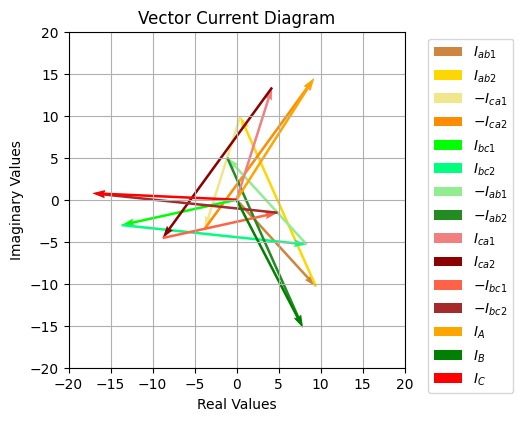

In [26]:
create_vector_diagram_no_text(CurrentsA)
create_vector_diagram_no_text(CurrentsB)
create_vector_diagram_no_text(CurrentsC)
create_vector_diagram_no_text(Current_A)
create_vector_diagram_no_text(Current_B)
create_vector_diagram_no_text(Current_C)




plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Current Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-20, 20)
plt.ylim(-20, 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Видим, что у токов произошёл сдвиг на 120 градусов

Для удобства различения токи разделены на группы: жёлтую (оранжевую), зелёную, красную

Теперь можем составить таблицу со всеми значениями



In [27]:
from tabulate import tabulate

headers = ["Element", "Circuit (A)", "Voltage (V)"]
data = [
    ["$ab 1$", I_ab1, U_ab],
    ["$ab 2$", I_ab2, U_ab],
    ["$bc 1$", I_bc1, U_bc],
    ["$bc 2$", I_bc2, U_bc],
    ["$ca 1$", I_ca1, U_ca],
    ["$ca 2$", I_ca2, U_ca],
    ["$linear A", I_A, U_an1l],
    ["$linear B", I_B, U_bn1l],
    ["$linear C", I_C, U_cn1l],
]

table = tabulate(data, headers=headers, tablefmt="fancy_grid", numalign="center", stralign="center")

print(table)

╒═══════════╤═══════════════════════════════════════════╤══════════════════════════════════════════╕
│  Element  │                Circuit (A)                │               Voltage (V)                │
╞═══════════╪═══════════════════════════════════════════╪══════════════════════════════════════════╡
│  $ab 1$   │  (9.45444372903764-10.344526667683649j)   │ (121.46407119626576+54.056413558287815j) │
├───────────┼───────────────────────────────────────────┼──────────────────────────────────────────┤
│  $ab 2$   │ (-9.009402259714635+20.244011866044293j)  │ (121.46407119626576+54.056413558287815j) │
├───────────┼───────────────────────────────────────────┼──────────────────────────────────────────┤
│  $bc 1$   │ (-13.685844748858448-3.0155251141552513j) │ (-13.917808219178083-132.2191780821918j) │
├───────────┼───────────────────────────────────────────┼──────────────────────────────────────────┤
│  $bc 2$   │   (22.0365296803653-2.319634703196347j)   │ (-13.917808219178083-132.21917808

Выведем с углами в градусах

In [28]:
from tabulate import tabulate

headers = ["Element", "Circuit (A)", "Voltage (V)"]
data = [
    ["ab 1", format_complex_exp(I_ab1), format_complex_exp(U_ab)],
    ["ab 2", format_complex_exp(I_ab2), format_complex_exp(U_ab)],
    ["bc 1", format_complex_exp(I_bc1), format_complex_exp(U_bc)],
    ["bc 2", format_complex_exp(I_bc2), format_complex_exp(U_bc)],
    ["ca 1", format_complex_exp(I_ca1), format_complex_exp(U_ca)],
    ["ca 2", format_complex_exp(I_ca2), format_complex_exp(U_ca)],
    ["linear A", format_complex_exp(I_A), format_complex_exp(U_an1l)],
    ["linear B", format_complex_exp(I_B), format_complex_exp(U_bn1l)],
    ["linear C", format_complex_exp(I_C), format_complex_exp(U_cn1l)],
    ["Voltage A", format_complex_exp(I_A), format_complex_exp(EA)],
    ["Voltage B", format_complex_exp(I_B), format_complex_exp(EB)],
    ["Voltage C", format_complex_exp(I_C), format_complex_exp(EC)],
]

table = tabulate(data, headers=headers, tablefmt="fancy_grid", numalign="center", stralign="center")

print(table)

╒═══════════╤═════════════════════════════╤═════════════════════════════╕
│  Element  │         Circuit (A)         │         Voltage (V)         │
╞═══════════╪═════════════════════════════╪═════════════════════════════╡
│   ab 1    │ 14.0141263803 * e^(-47.57)  │ 132.9496763379 * e^(23.99)  │
├───────────┼─────────────────────────────┼─────────────────────────────┤
│   ab 2    │ 22.1582793897 * e^(113.99)  │ 132.9496763379 * e^(23.99)  │
├───────────┼─────────────────────────────┼─────────────────────────────┤
│   bc 1    │ 14.0141263803 * e^(-167.57) │ 132.9496763379 * e^(-96.01) │
├───────────┼─────────────────────────────┼─────────────────────────────┤
│   bc 2    │  22.1582793897 * e^(-6.01)  │ 132.9496763379 * e^(-96.01) │
├───────────┼─────────────────────────────┼─────────────────────────────┤
│   ca 1    │  14.0141263803 * e^(72.43)  │ 132.9496763379 * e^(143.99) │
├───────────┼─────────────────────────────┼─────────────────────────────┤
│   ca 2    │ 22.1582793897 * e^(-126.

Мы посчитали всё через законы Кирхгофа, а если посмотрим на схему, то увидим, что можно было просто использовать сдвиги на $\dfrac{2 \pi}{3}$

Теперь проверим баланс мощности

Создадим функцию для расчёта активной и реактивной мощностей


```
Power_calculation()
```



In [29]:
"""
Power_calculation() calculates power as real and imaginary parts of multiplications voltage on conjuncted circuit
"""

def Power_calculation(V, I):
    S = V * np.conj(I)
    P = S.real
    Q = S.imag
    return P, Q

Теперь для каждого элемента посчитаем мощности и проверим баланс

In [30]:
P_E1, Q_E1 = Power_calculation(EA, I_A)
P_E2, Q_E2 = Power_calculation(EB, I_B)
P_E3, Q_E3 = Power_calculation(EC, I_C)

P_linearA, Q_linearA = Power_calculation(U_an1l, I_A)
P_linearB, Q_linearB = Power_calculation(U_bn1l, I_B)
P_linearC, Q_linearC = Power_calculation(U_cn1l, I_C)

P_ab1, Q_ab1 = Power_calculation(U_ab, I_ab1)
P_ab2, Q_ab2 = Power_calculation(U_ab, I_ab2)

P_bc1, Q_bc1 = Power_calculation(U_bc, I_bc1)
P_bc2, Q_bc2 = Power_calculation(U_bc, I_bc2)

P_ca1, Q_ca1 = Power_calculation(U_ca, I_ca1)
P_ca2, Q_ca2 = Power_calculation(U_ca, I_ca2)

Проверим активную мощность

In [31]:
print(P_E1 + P_E2 + P_E3)
print(P_linearA + P_linearB + P_linearC + P_ab1 + P_ab2 + P_bc1 + P_bc2 + P_ca1 + P_ca2)

2032.6958904109583
2032.6958904109586


Как видим она совпала с высокой точностью, теперь проверим реактивную мощность

In [32]:
print(Q_E1 + Q_E2 + Q_E3)
print(Q_linearA + Q_linearB + Q_linearC + Q_ab1 + Q_ab2 + Q_bc1 + Q_bc2 + Q_ca1 + Q_ca2)

-3181.610958904109
-3181.61095890411


Реактивная тоже совпала

Теперь построим диаграмму напряжений, направление обхода против токов

In [33]:
Voltages_A = {
    '$U_{an1}$': {'magnitude': abs(U_an1), 'angle': np.angle(U_an1), 'color': 'tan'},
    '$U_{an1l}$': {'magnitude': abs(U_an1l), 'angle': np.angle(U_an1l), 'color': 'darkorange'},
}
Voltages_B = {
    '$U_{bn1}$': {'magnitude': abs(U_bn1), 'angle': np.angle(U_bn1), 'color': 'darkolivegreen'},
    '$U_{bn1l}$': {'magnitude': abs(U_bn1l), 'angle': np.angle(U_bn1l), 'color': 'lime'},
}
Voltages_C = {
    '$U_{cn1}$': {'magnitude': abs(U_cn1), 'angle': np.angle(U_cn1), 'color': 'darkred'},
    '$U_{cn1l}$': {'magnitude': abs(U_cn1l), 'angle': np.angle(U_cn1l), 'color': 'lightcoral'},
}

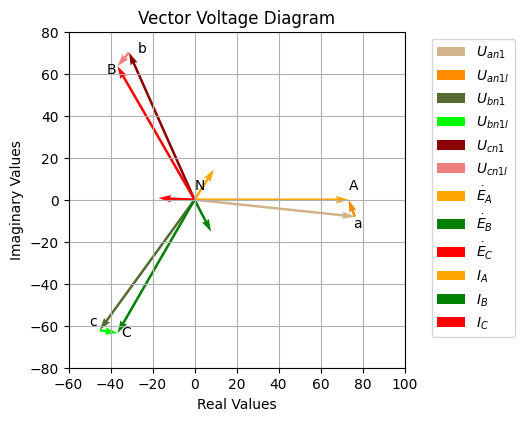

In [34]:
create_vector_diagram_no_text(Voltages_A)
create_vector_diagram_no_text(Voltages_B)
create_vector_diagram_no_text(Voltages_C)

plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-60, 100)
plt.ylim(-80, 80)

plt.quiver(0, 0, abs(EA) *np.cos(EA_angle), abs(EA) *np.sin(EA_angle), angles='xy', scale_units='xy', scale=1,
           color='orange',
           label='$\dot{E}_A$')
plt.quiver(0, 0, abs(EB) *np.cos(EB_angle), abs(EB) *np.sin(EB_angle), angles='xy', scale_units='xy', scale=1,
           color='green',
           label='$\dot{E}_B$')
plt.quiver(0, 0, abs(EC) *np.cos(EC_angle), abs(EC) *np.sin(EC_angle), angles='xy', scale_units='xy', scale=1,
           color='red',
           label='$\dot{E}_C$')

create_vector_diagram_no_text(Current_A)
create_vector_diagram_no_text(Current_B)
create_vector_diagram_no_text(Current_C)



plt.text(0, 5, "N")
plt.text(abs(EA), 5, "A")
plt.text(abs(EA)+2, -13, "a")


plt.text(-27, 70, "b")
plt.text(-42, 60, "B")

plt.text(-35, -65, "C")
plt.text(-50, -60, "c")

plt.legend(bbox_to_anchor=(1.06, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)

In [35]:
print(np.arctan(np.real(2.3-3.6j)/np.imag(2.3-3.6j))*180/np.pi)

-32.57405713457251


Подытожим, все токи и напряжения сдвинуты на 120 градусов. В системе чётко прослеживается симметрия, это отчётливо видно на векторных диаграммах

# Задание 2

## Пункт 1

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

In [42]:
def create_vector_diagram_no_text(dict_name):
    start_point_x = 0
    start_point_y = 0


    for name, params in dict_name.items():
        magnitude = params['magnitude']
        angle = params['angle']
        color = params['color']

        # Построение вектора
        plt.quiver(start_point_x, start_point_y, magnitude * np.cos(angle), magnitude * np.sin(angle),
                  angles='xy', scale_units='xy', scale=1, color=color, label=name)

        # Обновление начальной точки для следующего вектора
        start_point_x += magnitude * np.cos(angle)
        start_point_y += magnitude * np.sin(angle)

Примем угол для $U_{AB}$ за $0^{\circ}$, ⇒ $U_{AB} = 220$ углы для других напряжений найдём по теореме косинусов \\
$
U_{BC} = 127\underline{/-150^{\circ}} \\
U_{CA} = 127\underline{/150^{\circ}}
$

Зададим исходные данные

In [43]:
e = 2.7182818284590452353602874713526624977572
Z_1 = 30 + 20j
Z_2 = 45j
Z_3 = 20 - 30j
Z_n = 2 + 3j
U_AB = 220
U_BC = 127* e**(-150j*np.pi/180)
U_CA = 127* e**(150j*np.pi/180)

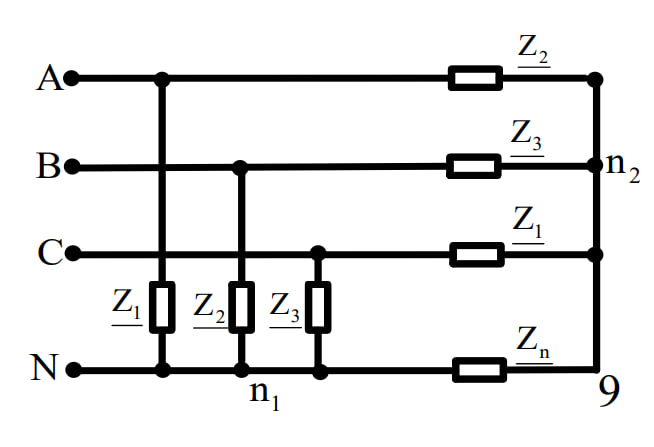

Заметим, что $\phi_{n1} = \phi_{N}  \neq \phi{n2}$

In [44]:
Voltages_input = {
    '$\dot{U}_{AB}$': {'magnitude': abs(U_AB), 'angle': np.angle(U_AB), 'color': 'orange'},
    '$\dot{U}_{CA}$': {'magnitude': abs(U_CA), 'angle': np.angle(U_CA), 'color': 'red'},
    '$\dot{U}_{BC}$': {'magnitude': abs(U_BC), 'angle': np.angle(U_BC), 'color': 'green'},
}

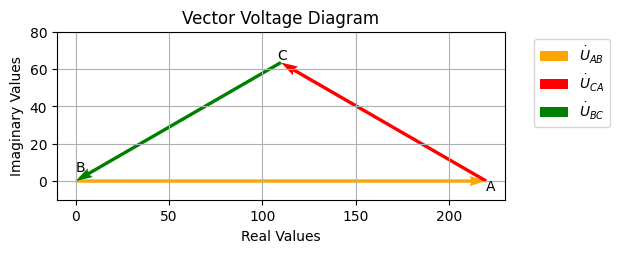

In [45]:
create_vector_diagram_no_text(Voltages_input)

plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()



plt.text(0, 5, "B")
plt.text(220, -5, "A")
plt.text(108, 65, "C")


plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-10, 230)
plt.ylim(-10, 80)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

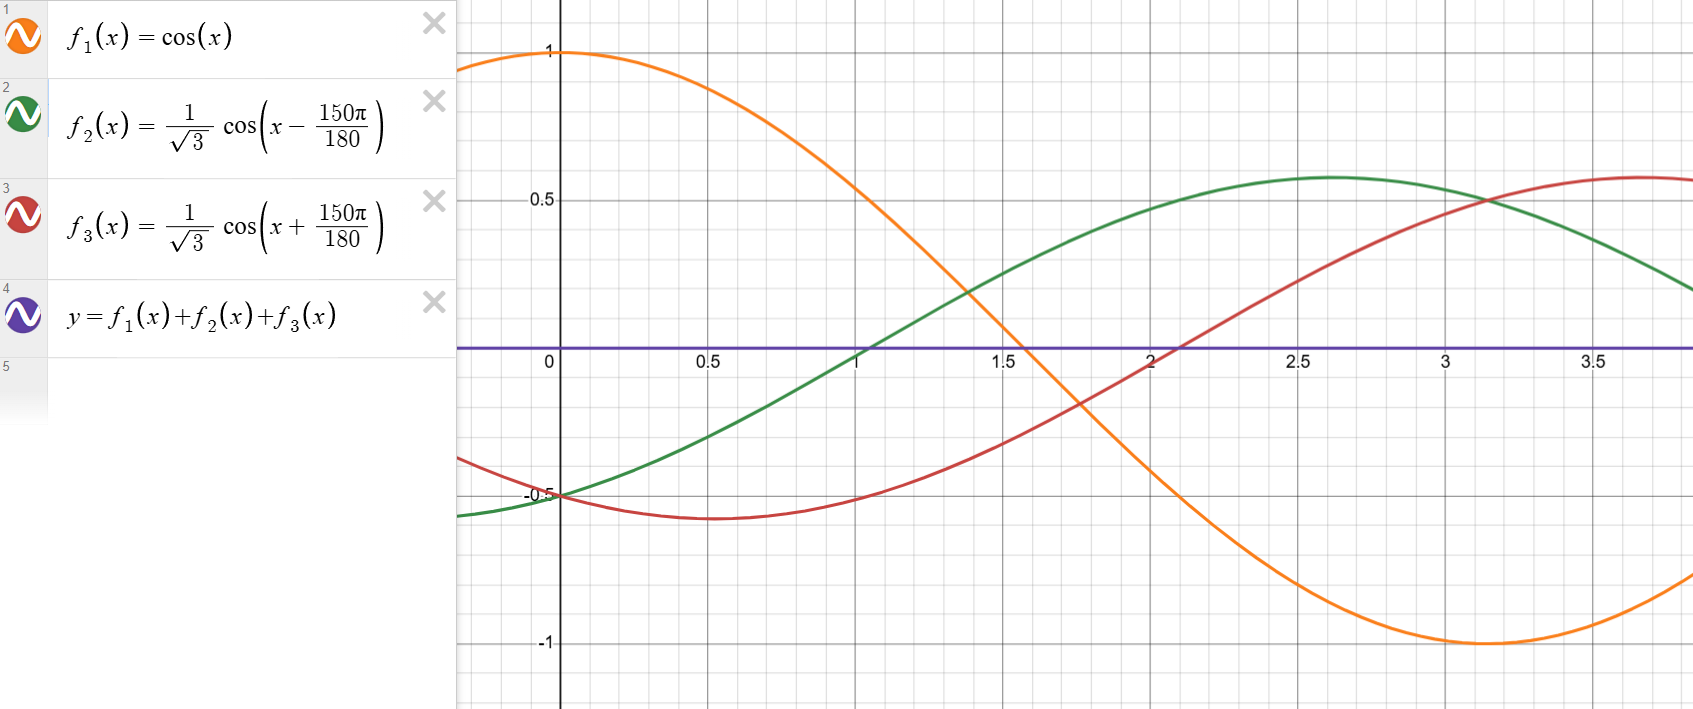

Также построим графики, чтобы во второй раз убедиться в верности углов, как видим сумма всех напряжений равна нулю

Комментарий: для удобства вместо 220 и 127, взяли $1$ и $\dfrac{1}{\sqrt{3}}$

Также нам нужно найти точку N, так как у нас еще есть нейтраль. \\
Используя, простые тригонометрические формулы получим

$
\dot{E}_A = 112 \cdot e^{-10.8833333i \pi /180} \\
\dot{E}_B = 112 \cdot e^{190.9i \pi /180} \\
\dot{E}_C = 42.335229 \cdot e^{90i \pi /180} \\
$

In [46]:
E_A = 112 * e**(-10.83333333j*np.pi/180)
E_B = 112 * e**(190.9j*np.pi/180)
E_C = 42.335229 * e**(90j*np.pi/180)

In [47]:
print(E_A + E_B + E_C)

(0.02456807193363179+0.10583089871941098j)


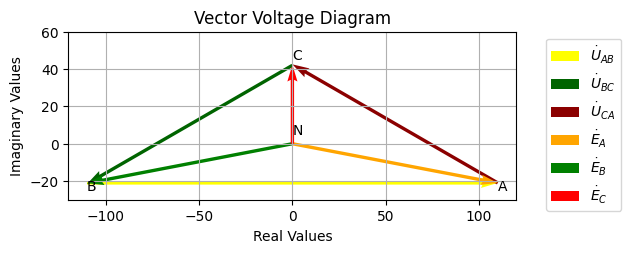

In [48]:
plt.quiver(-110, -21, abs(U_AB) * np.cos(np.angle(U_AB)), abs(U_AB) * np.sin(np.angle(U_AB)),
                  angles='xy', scale_units='xy',  scale=1, color="yellow", label="$\dot{U}_{AB}$")
plt.quiver(0, 42, abs(U_BC) * np.cos(np.angle(U_BC)), abs(U_BC) * np.sin(np.angle(U_BC)),
                  angles='xy', scale_units='xy',  scale=1, color="darkgreen", label="$\dot{U}_{BC}$")
plt.quiver(110, -21, abs(U_CA) * np.cos(np.angle(U_CA)), abs(U_CA) * np.sin(np.angle(U_CA)),
                  angles='xy', scale_units='xy',  scale=1, color="darkred", label="$\dot{U}_{CA}$")

plt.quiver(0, 0, abs(E_A) * np.cos(np.angle(E_A)), abs(E_A) * np.sin(np.angle(E_A)),
                  angles='xy', scale_units='xy',  scale=1, color="orange", label="$\dot{E}_{A}$")
plt.quiver(0, 0, abs(E_B) * np.cos(np.angle(E_B)), abs(E_B) * np.sin(np.angle(E_B)),
                  angles='xy', scale_units='xy',  scale=1, color="green", label="$\dot{E}_{B}$")
plt.quiver(0, 0, abs(E_C) * np.cos(np.angle(E_C)), abs(E_C) * np.sin(np.angle(E_C)),
                  angles='xy', scale_units='xy',  scale=1, color="red", label="$\dot{E}_{C}$")

plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()


plt.text(0, 5, "N")
plt.text(-110, -25, "B")
plt.text(110, -25, "A")
plt.text(0, 45, "C")


plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-120, 120)
plt.ylim(-30, 60)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Из медиан треугольника можно составить треугольник. А поскольку мы использовали отрезки длиной 2/3 от медианы, то можем составить треугольник, а если это возможно, то сумма всех трёх векторов будет равна $\dot{0}$

## Пункт 2

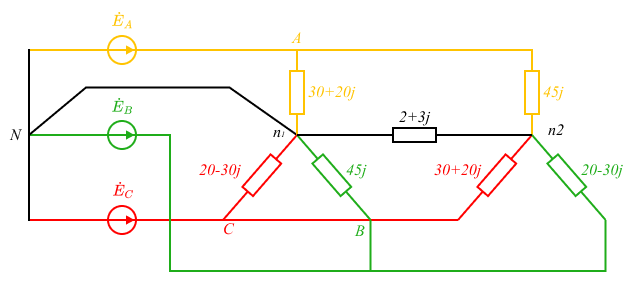

Ранее мы говорили, что $\varphi_{n1} = \varphi_{N}  \neq \varphi_{n2}$ \\
Так как $\varphi_{N}=0$ \\
Очевидно, что потенциалы точек: \\
$
\dot{\varphi}_{A} = \dot{E}_{A} \\
\dot{\varphi}_{B} = \dot{E}_{B} \\
\dot{\varphi}_{C} = \dot{E}_{C}
$

$
\dot{U}_{An1} = \dot{E}_A \Rightarrow \dot{I}_{An1} = \dfrac{\dot{U}_{An1}}{\underline{Z_1}} \\
\dot{U}_{Bn1} = \dot{E}_B \Rightarrow \dot{I}_{Bn1} = \dfrac{\dot{U}_{Bn1}}{\underline{Z_2}} \\
\dot{U}_{Cn1} = \dot{E}_C \Rightarrow \dot{I}_{Cn1} = \dfrac{\dot{U}_{Cn1}}{\underline{Z_3}}
$

In [49]:
I_An1 = E_A / Z_1
I_Bn1 = E_B / Z_2
I_Cn1 = E_C / Z_3

In [50]:
Currents_to_n1_1 = {
    '$I_{An1}$': {'magnitude': abs(I_An1), 'angle': np.angle(I_An1), 'color': 'orange'},
    '$I_{Bn1}$': {'magnitude': abs(I_Bn1), 'angle': np.angle(I_Bn1), 'color': 'green'},
    '$I_{Cn1}$': {'magnitude': abs(I_Cn1), 'angle': np.angle(I_Cn1), 'color': 'red'},
}

Сложим токи входящие в узел $n_1$ и посмотрим, что получится

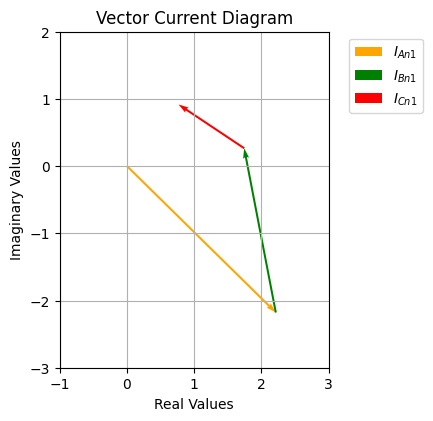

In [51]:
create_vector_diagram_no_text(Currents_to_n1_1)

plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Current Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-1, 3)
plt.ylim(-3, 2)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Снова обратимся к схеме \\
$
\dot{U}_{n2n1} = \dot{\varphi}_{n2} - \dot{\varphi}_{n1} = \dot{\varphi}_{n2} = \dfrac{\dot{E}_A \cdot \underline{Y}_2 + \dot{E}_B \cdot \underline{Y}_3 + \dot{E}_C \cdot \underline{Y}_1}{\underline{Y}_1 + \underline{Y}_2 + \underline{Y}_3 + \underline{Y}_n}
$

In [52]:
U_n2n1 = (E_A * 1/Z_2 + E_B * 1/Z_3 + E_C * 1/Z_1)/(1/Z_1 + 1/Z_2 + 1/Z_3 + 1/Z_n)

Теперь можно найти ток

$
\dot{U}_{n2n1} = \dot{I}_{n2n1} \cdot \underline{Z_n} \\
\dot{I}_{n2n1} =  \dfrac{\dot{U}_{n2n1}}{\underline{Z_n}}
$

In [53]:
I_n2n1 = U_n2n1/Z_n

Воспользуемся I-м законом Кирхгофа \\
$
\dot{I}_{An1} + \dot{I}_{Bn1} + \dot{I}_{Cn1} + \dot{I}_{n2n1} + \dot{I}_{Nn1} = \dot{0} \Rightarrow \\
\dot{I}_{Nn1} = - \dot{I}_{An1} - \dot{I}_{Bn1} - \dot{I}_{Cn1} - \dot{I}_{n2n1}
$

In [54]:
I_Nn1 = -I_An1 - I_Bn1 - I_Cn1 - I_n2n1

In [55]:
Currents_to_n1 = {
    '$I_{An1}$': {'magnitude': abs(I_An1), 'angle': np.angle(I_An1), 'color': 'orange'},
    '$I_{Bn1}$': {'magnitude': abs(I_Bn1), 'angle': np.angle(I_Bn1), 'color': 'green'},
    '$I_{Cn1}$': {'magnitude': abs(I_Cn1), 'angle': np.angle(I_Cn1), 'color': 'red'},
    '$I_{n2n1}$': {'magnitude': abs(I_n2n1), 'angle': np.angle(I_n2n1), 'color': 'black'},
    '$I_{Nn1}$': {'magnitude': abs(I_Nn1), 'angle': np.angle(I_Nn1), 'color': 'violet'},
}

Графически проверим

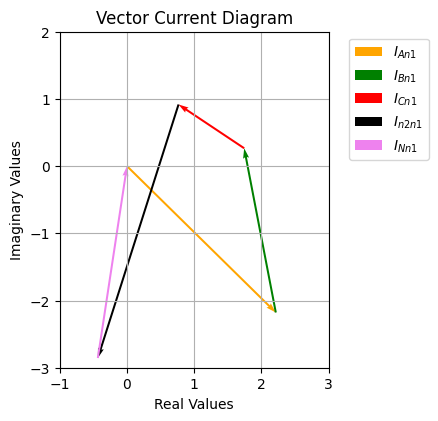

In [56]:
create_vector_diagram_no_text(Currents_to_n1)

plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Current Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-1, 3)
plt.ylim(-3, 2)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Найдём потенциал точки $n_2$ \
$
\dot{U}_{An2} + \dot{U}_{n2n1} + \dot{U}_{n1A} = \dot{0} \\
\dot{U}_{An2} = -\dot{U}_{n2n1} + \dot{U}_{An1} = -\dot{U}_{n2n1} + \dot{E}_{A} = \dot{0}
$

In [57]:
U_An2 = -U_n2n1 + E_A

$
\dot{U}_{An2} = \dot{\varphi}_{A} - \dot{\varphi}_{n2} \Rightarrow \\
\dot{\varphi}_{n2} = \dot{\varphi}_{A} - \dot{U}_{An2}
$

In [58]:
phi_n2 = E_A - U_An2

$
\dot{U}_{Bn2} = \dot{\phi}_B - \dot{\varphi}_{n2} \\
\dot{U}_{Cn2} = \dot{\phi}_C - \dot{\varphi}_{n2}
$

In [59]:
U_Bn2 = E_B - phi_n2
U_Cn2 = E_C - phi_n2

Выполним проверку, для этого обойдём контуры двух звёзд и нейтраль между ними

$
\dot{U}_{An1} + \dot{U}_{n1n2} + \dot{U}_{n2A} = \dot{0} \\
\dot{E}_A - \dot{U}_{n2n1} - \dot{U}_{An2} = \dot{0} \\
\dot{E}_B - \dot{U}_{n2n1} - \dot{U}_{Bn2} = \dot{0} \\
\dot{E}_C - \dot{U}_{n2n1} - \dot{U}_{Cn2} = \dot{0} \\
$

In [60]:
print(E_A - U_n2n1 - U_An2)
print(E_B - U_n2n1 - U_Bn2)
print(E_C - U_n2n1 - U_Cn2)

0j
0j
(5.329070518200751e-15+0j)


Проверка успешно прошла, в третьем случае у нас получилось, что $5\cdot 10^{-15}$ отлично от нуля. что является не плохим результатом

Найдём токи на элементах звезды 2 \
$
\dot{I}_{An2} = \dfrac{\dot{U}_{An2}}{\underline{Z_{2}}} \\
\dot{I}_{Bn2} = \dfrac{\dot{U}_{Bn2}}{\underline{Z_{3}}} \\
\dot{I}_{Cn2} = \dfrac{\dot{U}_{Cn2}}{\underline{Z_{1}}}
$

In [61]:
I_An2 = U_An2/Z_2
I_Bn2 = U_Bn2/Z_3
I_Cn2 = U_Cn2/Z_1

Выполним проверку \
$
\dot{I}_{An2} + \dot{I}_{Bn2} + \dot{I}_{Cn2} - \dot{I}_{n2n1} = \dot{0}
$

In [62]:
print(I_An2 + I_Bn2 + I_Cn2 - I_n2n1)

4.440892098500626e-16j


Снова совпало, расхождение на 16м знаке

Найдём токи на источниках напряжения \
$
\dot{I}_{NA} - \dot{I}_{An1} - \dot{I}_{An2} = \dot{0} \\
\dot{I}_{NB} - \dot{I}_{Bn1} - \dot{I}_{Bn2} = \dot{0} \\
\dot{I}_{NC} - \dot{I}_{Cn1} - \dot{I}_{Cn2} = \dot{0} \\
$

In [63]:
I_NA = I_An1 + I_An2
I_NB = I_Bn1 + I_Bn2
I_NC = I_Cn1 + I_Cn2

In [64]:
print(f"I_A = {I_NA}")
print(f"I_B = {I_NB}")
print(f"I_C = {I_NC}")

I_A = (1.994641028404187-4.424517005449703j)
I_B = (-2.068350374056563-0.45410472368789057j)
I_C = (-0.35993487079077713+2.0227394593718087j)


Теперь выполним проверку \
$
\dot{I}_{NA} + \dot{I}_{NB} + \dot{I}_{NC} - \dot{I}_{Nn1} = \dot{0}
$

In [65]:
print(I_NA + I_NB + I_NC + I_Nn1)

(-4.440892098500626e-16-8.881784197001252e-16j)


Проверка успешно прошла, погрешность на 16м знаке

Чтобы ещё раз убедиться проверим для точек $A, B, C$ по I-му закону Кирхгофа \
$
\dot{I}_{NA} - \dot{I}_{An2} - \dot{I}_{An1} = \dot{0} \\
\dot{I}_{NB} - \dot{I}_{Bn2} - \dot{I}_{Bn1} = \dot{0} \\
\dot{I}_{NC} - \dot{I}_{Cn2} - \dot{I}_{Cn1} = \dot{0}
$

In [66]:
print(I_NA - I_An2 - I_An1)
print(I_NB - I_Bn2 - I_Bn1)
print(I_NC - I_Cn2 - I_Cn1)

-4.440892098500626e-16j
(-1.1102230246251565e-16+0j)
-2.220446049250313e-16j


Совпало до 16го знака после запятой

Составим таблицу для всех элементов

In [67]:
from tabulate import tabulate

headers = ["Element", "Circuit (A)", "Voltage (V)"]
data = [
    ["$E_A$", I_NA, E_A],
    ["$E_B$", I_NB, E_B],
    ["$E_C$", I_NC, E_C],
    ["$A n1$", I_An1, E_A],
    ["$B n1$", I_Bn1, E_B],
    ["$C n1$", I_Cn1, E_C],
    ["$A n2$", I_An2, U_An2],
    ["$B n2$", I_Bn2, U_Bn2],
    ["$C n2$", I_Cn2, U_Cn2],
    ["$N n1$", I_Nn1, 0],
    ["$n2 n1$", I_n2n1, U_n2n1],
]

table = tabulate(data, headers=headers, tablefmt="fancy_grid", numalign="center", stralign="center")

print(table)

╒═══════════╤════════════════════════════════════════════╤═══════════════════════════════════════════╕
│  Element  │                Circuit (A)                 │                Voltage (V)                │
╞═══════════╪════════════════════════════════════════════╪═══════════════════════════════════════════╡
│   $E_A$   │   (1.994641028404187-4.424517005449703j)   │  (110.00394389393531-21.05070848641276j)  │
├───────────┼────────────────────────────────────────────┼───────────────────────────────────────────┤
│   $E_B$   │ (-2.068350374056563-0.45410472368789057j)  │ (-109.97937582200169-21.178689614867828j) │
├───────────┼────────────────────────────────────────────┼───────────────────────────────────────────┤
│   $E_C$   │ (-0.35993487079077713+2.0227394593718087j) │     (2.59228513430101e-15+42.335229j)     │
├───────────┼────────────────────────────────────────────┼───────────────────────────────────────────┤
│  $A n1$   │   (2.214695497761388-2.178153948054684j)   │  (110.00394389

## Пункт 3

Создадим функцию для расчёта активной и реактивной мощностей


```
Power_calculation()
```



In [68]:
"""
Power_calculation() calculates power as real and imaginary parts of multiplications voltage on conjuncted circuit
"""

def Power_calculation(V, I):
    S = V * np.conj(I)
    P = S.real
    Q = S.imag
    return P, Q

In [69]:
P_EA, Q_EA = Power_calculation(E_A, I_NA)
P_EB, Q_EB = Power_calculation(E_B, I_NB)
P_EC, Q_EC = Power_calculation(E_C, I_NC)

P_An1, Q_An1 = Power_calculation(E_A, I_An1)
P_Bn1, Q_Bn1 = Power_calculation(E_B, I_Bn1)
P_Cn1, Q_Cn1 = Power_calculation(E_C, I_Cn1)

P_An2, Q_An2 = Power_calculation(U_An2, I_An2)
P_Bn2, Q_Bn2 = Power_calculation(U_Bn2, I_Bn2)
P_Cn2, Q_Cn2 = Power_calculation(U_Cn2, I_Cn2)

P_n2n1, Q_n2n1 = Power_calculation(U_n2n1, I_n2n1)

Посчитаем активную мощность

In [70]:
print(P_EA + P_EB + P_EC)
print(P_An1 + P_Bn1 + P_Cn1 + P_An2 + P_Bn2 + P_Cn2 + P_n2n1)

635.2839617874307
635.2839617874306


Посчитаем реактивную мощность

In [71]:
print(Q_EA + Q_EB + Q_EC)
print(Q_An1 + Q_Bn1 + Q_Cn1 + Q_An2 + Q_Bn2 + Q_Cn2 + Q_n2n1)

423.3505849391867
423.3505849391866


Как видим баланс мощностей сошёлся с высокой точностью, поэтому посчитаем коэффициент мощности источника \
$
k = \dfrac{P}{S}
$

In [115]:
"""
Power_calculation_pro() calculates power as real and imaginary parts of multiplications voltage on conjuncted circuit
"""

def Power_calculation_S(V, I):
    S = V * np.conj(I)
    return S

In [117]:
S_EA = Power_calculation_S(E_A, I_NA)
S_EB = Power_calculation_S(E_B, I_NB)
S_EC = Power_calculation_S(E_C, I_NC)

In [118]:
print(S_EA)

(312.5575974520133+444.7257136012767j)


In [119]:
print(f"коэффициент мощности источника A = {P_EA/abs(S_EA)}")
print(f"коэффициент мощности источника B = {P_EB/abs(S_EB)}")
print(f"коэффициент мощности источника C = {P_EC/abs(S_EC)}")

коэффициент мощности источника A = 0.5750041818885007
коэффициент мощности источника B = 0.9996651467043772
коэффициент мощности источника C = 0.9845342490485534


## Пункт 4

In [73]:
Voltages_NAn1N = {
    '$E_{A}$': {'magnitude': abs(E_A), 'angle': np.angle(E_A), 'color': 'orange'},
}

Voltages_NBn1N = {
    '$E_{B}$': {'magnitude': abs(E_B), 'angle': np.angle(E_B), 'color': 'green'},
}

Voltages_NCn1N = {
    '$E_{C}$': {'magnitude': abs(E_C), 'angle': np.angle(E_C), 'color': 'red'},
}

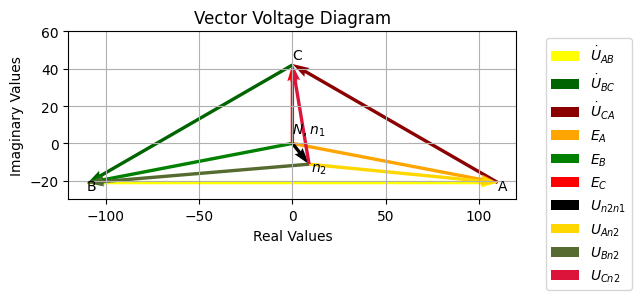

In [102]:
plt.quiver(-110, -21, abs(U_AB) * np.cos(np.angle(U_AB)), abs(U_AB) * np.sin(np.angle(U_AB)),
                  angles='xy', scale_units='xy',  scale=1, color="yellow", label="$\dot{U}_{AB}$")
plt.quiver(0, 42, abs(U_BC) * np.cos(np.angle(U_BC)), abs(U_BC) * np.sin(np.angle(U_BC)),
                  angles='xy', scale_units='xy',  scale=1, color="darkgreen", label="$\dot{U}_{BC}$")
plt.quiver(110, -21, abs(U_CA) * np.cos(np.angle(U_CA)), abs(U_CA) * np.sin(np.angle(U_CA)),
                  angles='xy', scale_units='xy',  scale=1, color="darkred", label="$\dot{U}_{CA}$")

create_vector_diagram_no_text(Voltages_NAn1N)
create_vector_diagram_no_text(Voltages_NBn1N)
create_vector_diagram_no_text(Voltages_NCn1N)

plt.quiver(0, 0, abs(U_n2n1) * np.cos(np.angle(U_n2n1)), abs(U_n2n1) * np.sin(np.angle(U_n2n1)),
                  angles='xy', scale_units='xy',  scale=1, color="black", label="$U_{n2n1}$")


plt.quiver(abs(U_n2n1) * np.cos(np.angle(U_n2n1)), abs(U_n2n1) * np.sin(np.angle(U_n2n1)),
           abs(U_An2) * np.cos(np.angle(U_An2)), abs(U_An2) * np.sin(np.angle(U_An2)),
                  angles='xy', scale_units='xy',  scale=1, color="gold", label="$U_{An2}$")

plt.quiver(abs(U_n2n1) * np.cos(np.angle(U_n2n1)), abs(U_n2n1) * np.sin(np.angle(U_n2n1)),
           abs(U_Bn2) * np.cos(np.angle(U_Bn2)), abs(U_Bn2) * np.sin(np.angle(U_Bn2)),
                  angles='xy', scale_units='xy',  scale=1, color="darkolivegreen", label="$U_{Bn2}$")

plt.quiver(abs(U_n2n1) * np.cos(np.angle(U_n2n1)), abs(U_n2n1) * np.sin(np.angle(U_n2n1)),
           abs(U_Cn2) * np.cos(np.angle(U_Cn2)), abs(U_Cn2) * np.sin(np.angle(U_Cn2)),
                  angles='xy', scale_units='xy',  scale=1, color="crimson", label="$U_{Cn2}$")


plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()


plt.text(0, 5, "$N, n_1$")
plt.text(-110, -25, "B")
plt.text(110, -25, "A")
plt.text(0, 45, "C")
plt.text(10, -15, "$n_2$")


plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-120, 120)
plt.ylim(-30, 60)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

In [75]:
Currents_NAn1n2 = {
    '$I_{An1}$': {'magnitude': abs(I_An1), 'angle': np.angle(I_An1), 'color': 'wheat'},
    '$I_{An2}$': {'magnitude': abs(I_An2), 'angle': np.angle(I_An2), 'color': 'gold'},
}
Currents_NBn1n2 = {
    '$I_{Bn1}$': {'magnitude': abs(I_Bn1), 'angle': np.angle(I_Bn1), 'color': 'lime'},
    '$I_{Bn2}$': {'magnitude': abs(I_Bn2), 'angle': np.angle(I_Bn2), 'color': 'khaki'},
}
Currents_NCn1n2 = {
    '$I_{Cn1}$': {'magnitude': abs(I_Cn1), 'angle': np.angle(I_Cn1), 'color': 'brown'},
    '$I_{Cn2}$': {'magnitude': abs(I_Cn2), 'angle': np.angle(I_Cn2), 'color': 'coral'},
}


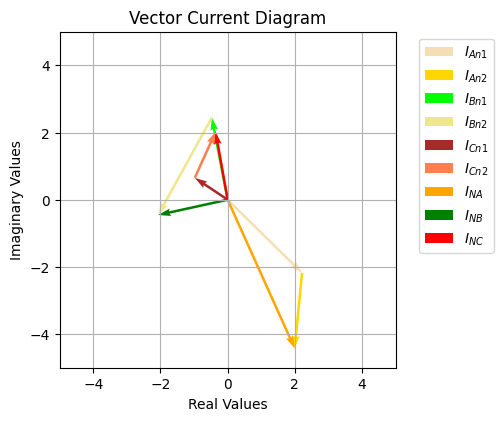

In [76]:
create_vector_diagram_no_text(Currents_NAn1n2)
create_vector_diagram_no_text(Currents_NBn1n2)
create_vector_diagram_no_text(Currents_NCn1n2)


plt.quiver(0, 0, abs(I_NA) * np.cos(np.angle(I_NA)), abs(I_NA) * np.sin(np.angle(I_NA)),
           angles='xy', scale_units='xy',  scale=1, color="orange", label="$I_{NA}$")
plt.quiver(0, 0, abs(I_NB) * np.cos(np.angle(I_NB)), abs(I_NB) * np.sin(np.angle(I_NB)),
           angles='xy', scale_units='xy',  scale=1, color="green", label="$I_{NB}$")
plt.quiver(0, 0, abs(I_NC) * np.cos(np.angle(I_NC)), abs(I_NC) * np.sin(np.angle(I_NC)),
           angles='xy', scale_units='xy',  scale=1, color="red", label="$I_{NC}$")

"""
plt.text(0, 0, "$N$")
plt.text(abs(I_NA) * np.cos(np.angle(I_NA)), abs(I_NA) * np.sin(np.angle(I_NA)), "$A$")
plt.text(abs(I_NB) * np.cos(np.angle(I_NB)), abs(I_NB) * np.sin(np.angle(I_NB)), "$B$")
plt.text(abs(I_NC) * np.cos(np.angle(I_NC)), abs(I_NC) * np.sin(np.angle(I_NC)), "$C$")
"""

plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Current Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

## Пункт 5

$
\dot{U}_{AB0} = \dfrac{1}{3}(\dot{U}_{AB} + \dot{U}_{BC} + \dot{U}_{CA}) \\
\dot{U}_{AB1} = \dfrac{1}{3}(\dot{U}_{AB} + a \cdot \dot{U}_{BC} + a^2 \cdot \dot{U}_{CA}) \\
\dot{U}_{AB2} = \dfrac{1}{3}(\dot{U}_{AB} + a^2 \cdot \dot{U}_{BC} + a \cdot \dot{U}_{CA}) \\
$

In [142]:
a = e**(120j*np.pi/180)
U_AB0 = 1/3 * (U_AB + U_BC + U_CA)
U_AB1 = 1/3 * (U_AB + a * U_BC + a**2 * U_CA)
U_AB2 = 1/3 * (U_AB + a**2 * U_BC + a * U_CA)

In [144]:
print(U_AB0)
print(U_AB1)
print(U_AB2)

(0.009849146250852906+0j)
(146.65681752041579-1.8947806286936004e-14j)
(73.33333333333334+0j)


$
\dot{U}_{BC1} = \dot{U}_{AB1} \cdot a^2 \\
\dot{U}_{BC2} = \dot{U}_{AB2} \cdot a \\
\dot{U}_{CA1} = \dot{U}_{AB1} \cdot a \\
\dot{U}_{CA2} = \dot{U}_{AB2} \cdot a^2 \\
$

In [145]:
U_AB1 = U_AB1
U_AB2 = U_AB2
U_BC1 = U_AB1*a**2
U_BC2 = U_AB2*a
U_CA1 = U_AB1*a
U_CA2 = U_AB2*a**2

Проверим работу поворотных множителей

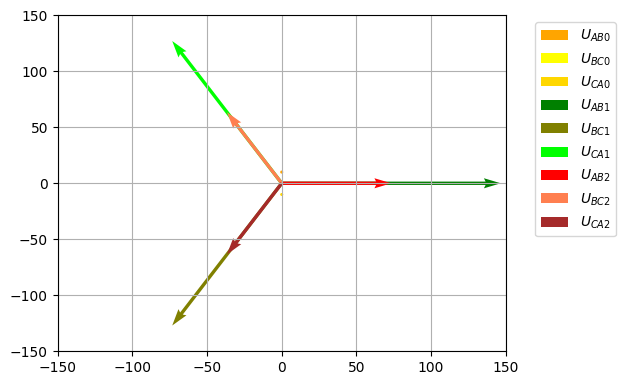

In [123]:
plt.quiver(0, 10, abs(U_A0) *np.cos(np.angle(U_A0)), abs(U_A0) *np.sin(np.angle(U_A0)), angles='xy', scale_units='xy', scale=1,
           color='orange',
           label='$U_{AB0}$')
plt.quiver(0, 0, abs(U_A0) *np.cos(np.angle(U_A0)), abs(U_A0) *np.sin(np.angle(U_A0)), angles='xy', scale_units='xy', scale=1,
           color='yellow',
           label='$U_{BC0}$')
plt.quiver(0, -10, abs(U_A0) *np.cos(np.angle(U_A0)), abs(U_A0) *np.sin(np.angle(U_A0)), angles='xy', scale_units='xy', scale=1,
           color='gold',
           label='$U_{CA0}$')


plt.quiver(0, 0, abs(U_A1) *np.cos(np.angle(U_A1)), abs(U_A1) *np.sin(np.angle(U_A1)), angles='xy', scale_units='xy', scale=1,
           color='green',
           label='$U_{AB1}$')
plt.quiver(0, 0, abs(U_A1) *np.cos(np.angle(U_A1*a**2)), abs(U_A1) *np.sin(np.angle(U_A1*a**2)), angles='xy', scale_units='xy', scale=1,
           color='olive',
           label='$U_{BC1}$')
plt.quiver(0, 0, abs(U_A1) *np.cos(np.angle(U_A1*a)), abs(U_A1) *np.sin(np.angle(U_A1*a)), angles='xy', scale_units='xy', scale=1,
           color='lime',
           label='$U_{CA1}$')



plt.quiver(0, 0, abs(U_A2) *np.cos(np.angle(U_A2)), abs(U_A2) *np.sin(np.angle(U_A2)), angles='xy', scale_units='xy', scale=1,
           color='red',
           label='$U_{AB2}$')
plt.quiver(0, 0, abs(U_A2) *np.cos(np.angle(U_A2*a)), abs(U_A2) *np.sin(np.angle(U_A2*a)), angles='xy', scale_units='xy', scale=1,
           color='coral',
           label='$U_{BC2}$')
plt.quiver(0, 0, abs(U_A2) *np.cos(np.angle(U_A2*a**2)), abs(U_A2) *np.sin(np.angle(U_A2*a**2)), angles='xy', scale_units='xy', scale=1,
           color='brown',
           label='$U_{CA2}$')


plt.tight_layout()
plt.legend()
plt.xlim(-150, 150) # предел по x откуда и до куда
plt.ylim(-150, 150) # предел по y
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Теперь приступим к построению \
Поскольку $U_{AB0} \approx 0$, то не будем его указывать вовсе

In [124]:
Voltages_symmetric = {
    '$U_{AB1}$': {'magnitude': abs(U_AB1), 'angle': np.angle(U_AB1), 'color': 'orange'},
    '$U_{AB2}$': {'magnitude': abs(U_AB2), 'angle': np.angle(U_AB2), 'color': 'gold'},
    '$U_{CA1}$': {'magnitude': abs(U_CA1), 'angle': np.angle(U_CA1), 'color': 'red'},
    '$U_{CA2}$': {'magnitude': abs(U_CA2), 'angle': np.angle(U_CA2), 'color': 'brown'},
    '$U_{BC1}$': {'magnitude': abs(U_BC1), 'angle': np.angle(U_BC1), 'color': 'green'},
    '$U_{BC2}$': {'magnitude': abs(U_BC2), 'angle': np.angle(U_BC2), 'color': 'springgreen'},
}

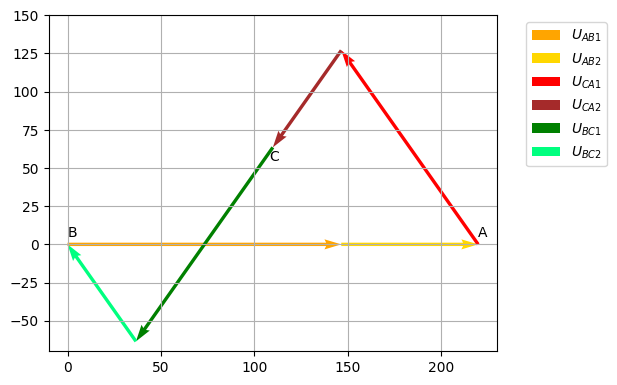

In [125]:
create_vector_diagram_no_text(Voltages_symmetric)

plt.text(0, 5, "B")
plt.text(220, 5, "A")
plt.text(108, 55, "C")


plt.tight_layout()
plt.legend()
plt.xlim(-10, 230)
plt.ylim(-70, 150)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Теперь проверим

In [126]:
Voltages_input2 = {
    '$U_{AB}$': {'magnitude': abs(U_AB), 'angle': np.angle(U_AB), 'color': 'darkorange'},
    '$U_{CA}$': {'magnitude': abs(U_CA), 'angle': np.angle(U_CA), 'color': 'darkred'},
    '$U_{BC}$': {'magnitude': abs(U_BC), 'angle': np.angle(U_BC), 'color': 'darkgreen'},
}

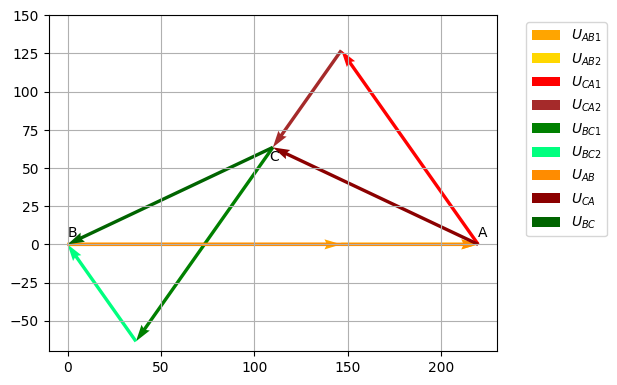

In [127]:
create_vector_diagram_no_text(Voltages_symmetric)
create_vector_diagram_no_text(Voltages_input2)

plt.text(0, 5, "B")
plt.text(220, 5, "A")
plt.text(108, 55, "C")


plt.tight_layout()
plt.legend()
plt.xlim(-10, 230)
plt.ylim(-70, 150)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Как видим всё совпало

Рассчитаем коэффициенты несимметрии \
$
k_{2U} = \dfrac{\dot{U}_{A2}}{\dot{U}_{A1}} \\
k_{0U} = \dfrac{\dot{U}_{A0}}{\dot{U}_{A1}} \\
$

In [128]:
print("$k_"'{2U}'" = " + str(f"{(U_A2/U_A1):.2f}") + "$")
print("$k_"'{0U}'" = " + str(f"{(U_A0/U_A1):.2f}") + "$")

$k_{2U} = 0.50+0.00j$
$k_{0U} = 0.00+0.00j$


$k_{2U} = 0.50+0.00j$ \
$k_{0U} = 0.00+0.00j$

Теперь разложим токи \
Это у нас токи \
$
I_{NA}, I_{NB}, I_{NC}
$

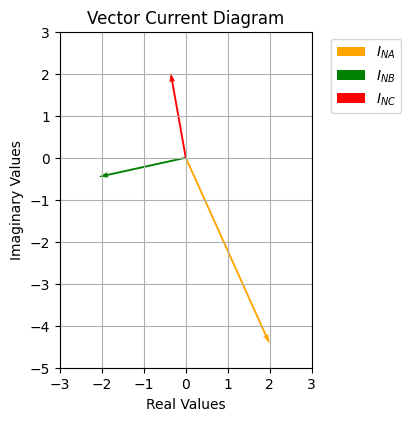

In [129]:
plt.quiver(0, 0, abs(I_NA) * np.cos(np.angle(I_NA)), abs(I_NA) * np.sin(np.angle(I_NA)),
           angles='xy', scale_units='xy',  scale=1, color="orange", label="$I_{NA}$")
plt.quiver(0, 0, abs(I_NB) * np.cos(np.angle(I_NB)), abs(I_NB) * np.sin(np.angle(I_NB)),
           angles='xy', scale_units='xy',  scale=1, color="green", label="$I_{NB}$")
plt.quiver(0, 0, abs(I_NC) * np.cos(np.angle(I_NC)), abs(I_NC) * np.sin(np.angle(I_NC)),
           angles='xy', scale_units='xy',  scale=1, color="red", label="$I_{NC}$")


#plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Current Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-3, 3)
plt.ylim(-5, 3)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

$
\dot{I}_{0} = \dfrac{1}{3}(\dot{I}_A + \dot{I}_B + \dot{I}_C) \\
\dot{I}_{1} = \dfrac{1}{3}(\dot{I}_A + a \cdot \dot{I}_B + a^2 \cdot \dot{I}_C) \\
\dot{I}_{2} = \dfrac{1}{3}(\dot{I}_A + a^2 \cdot \dot{I}_B + a \cdot \dot{I}_C) \\
$

In [130]:
a = e**(120j*np.pi/180)
I_A0 = 1/3 * (I_NA +        I_NB +        I_NC)
I_A1 = 1/3 * (I_NA + a *    I_NB + a**2 * I_NC)
I_A2 = 1/3 * (I_NA + a**2 * I_NB + a *    I_NC)

Воспользуемся формулой: \
$
\dot{I}_{A} = \dot{I}_{0} + \dot{I}_{1} + \dot{I}_{2} \\
\dot{I}_{B} = \dot{I}_{0} + a^2 \cdot \dot{I}_{1} + a \cdot \dot{I}_{2} \\
\dot{I}_{C} = \dot{I}_{0} + a \cdot \dot{I}_{1} + a^{2} \cdot \dot{I}_{2} \\
$

Построим графически, чтобы проверить

In [131]:
Currents_input2A = {
    '$I_{A0}$': {'magnitude': abs(I_A0), 'angle': np.angle(I_A0), 'color': 'darkorange'},
    '$I_{A1}$': {'magnitude': abs(I_A1), 'angle': np.angle(I_A1), 'color': 'bisque'},
    '$I_{A2}$': {'magnitude': abs(I_A2), 'angle': np.angle(I_A2), 'color': 'gold'},
}

Currents_input2B = {
    '$I_{B0}$': {'magnitude': abs(I_A0), 'angle': np.angle(I_A0), 'color': 'darkgreen'},
    '$I_{B1}$': {'magnitude': abs(I_A1), 'angle': np.angle(I_A1*a**2), 'color': 'springgreen'},
    '$I_{B2}$': {'magnitude': abs(I_A2), 'angle': np.angle(I_A2*a), 'color': 'lime'},
}

Currents_input2C = {
    '$I_{A0}$': {'magnitude': abs(I_A0), 'angle': np.angle(I_A0), 'color': 'brown'},
    '$I_{A1}$': {'magnitude': abs(I_A1), 'angle': np.angle(I_A1*a), 'color': 'darkred'},
    '$I_{A2}$': {'magnitude': abs(I_A2), 'angle': np.angle(I_A2*a**2), 'color': 'coral'},
}

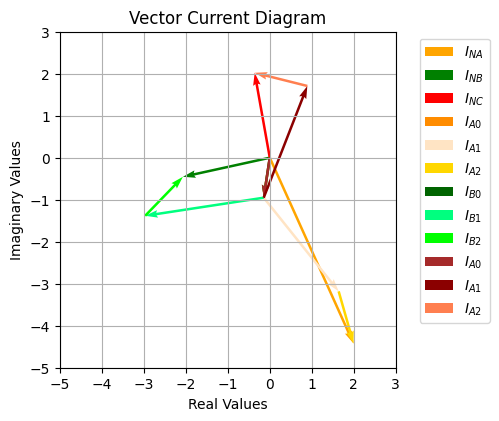

In [132]:
plt.quiver(0, 0, abs(I_NA) * np.cos(np.angle(I_NA)), abs(I_NA) * np.sin(np.angle(I_NA)),
           angles='xy', scale_units='xy',  scale=1, color="orange", label="$I_{NA}$")
plt.quiver(0, 0, abs(I_NB) * np.cos(np.angle(I_NB)), abs(I_NB) * np.sin(np.angle(I_NB)),
           angles='xy', scale_units='xy',  scale=1, color="green", label="$I_{NB}$")
plt.quiver(0, 0, abs(I_NC) * np.cos(np.angle(I_NC)), abs(I_NC) * np.sin(np.angle(I_NC)),
           angles='xy', scale_units='xy',  scale=1, color="red", label="$I_{NC}$")

create_vector_diagram_no_text(Currents_input2A)
create_vector_diagram_no_text(Currents_input2B)
create_vector_diagram_no_text(Currents_input2C)


#plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Current Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-5, 3)
plt.ylim(-5, 3)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Поскольку все три тока имеют одинаковые токи в нулевой последовательности, то на схеме они наложились. Но мы видим, что всё верно посчитано

Рассчитаем коэффициенты несимметрии \
$
k_{2I} = \dfrac{\dot{I}_{2}}{\dot{I}_{1}} \\
k_{0I} = \dfrac{\dot{I}_{0}}{\dot{I}_{1}} \\
$

In [133]:
print("$k_"'{2I}'" = " + str(f"{(I_A2/I_A1):.2f}") + "$")
print("$k_"'{0I}'" = " + str(f"{(I_A0/I_A1):.2f}") + "$")

$k_{2I} = 0.42-0.18j$
$k_{0I} = 0.23-0.25j$


$k_{2I} = 0.42-0.18j$ \
$k_{0I} = 0.23-0.25j$

У нас были взяты фазные напряжения и линейные токи, сейчас посчитаем для линейных напряжений

$
\dot{U}_{A0} = \dfrac{1}{3}(\dot{U}_{A} + \dot{U}_{B} + \dot{U}_{C}) \\
\dot{U}_{A1} = \dfrac{1}{3}(\dot{U}_{A} + a \cdot \dot{U}_{B} + a^2 \cdot \dot{U}_{C}) \\
\dot{U}_{A2} = \dfrac{1}{3}(\dot{U}_{A} + a^2 \cdot \dot{U}_{B} + a \cdot \dot{U}_{C}) \\
$

In [134]:
a = e**(120j*np.pi/180)
U_A0 = 1/3 * (E_A + E_B + E_C)
U_A1 = 1/3 * (E_A + a * E_B + a**2 * E_C)
U_A2 = 1/3 * (E_A + a**2 * E_B + a * E_C)

In [135]:
print(U_A0)
print(U_A1)
print(U_A2)

(0.008189357311210597+0.035276966239803656j)
(73.33276627310299-42.29130384439614j)
(36.6629882635211+21.20531839174356j)


In [136]:
U_AB1 = U_A1
U_AB2 = U_A2
U_BC1 = U_A1*a**2
U_BC2 = U_A2*a
U_CA1 = U_A1*a
U_CA2 = U_A2*a**2

Проверим работу поворотных множителей

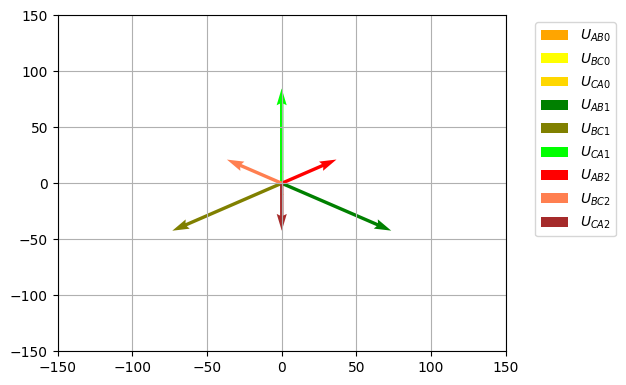

In [137]:
plt.quiver(0, 10, abs(U_A0) *np.cos(np.angle(U_A0)), abs(U_A0) *np.sin(np.angle(U_A0)), angles='xy', scale_units='xy', scale=1,
           color='orange',
           label='$U_{AB0}$')
plt.quiver(0, 0, abs(U_A0) *np.cos(np.angle(U_A0)), abs(U_A0) *np.sin(np.angle(U_A0)), angles='xy', scale_units='xy', scale=1,
           color='yellow',
           label='$U_{BC0}$')
plt.quiver(0, -10, abs(U_A0) *np.cos(np.angle(U_A0)), abs(U_A0) *np.sin(np.angle(U_A0)), angles='xy', scale_units='xy', scale=1,
           color='gold',
           label='$U_{CA0}$')


plt.quiver(0, 0, abs(U_A1) *np.cos(np.angle(U_A1)), abs(U_A1) *np.sin(np.angle(U_A1)), angles='xy', scale_units='xy', scale=1,
           color='green',
           label='$U_{AB1}$')
plt.quiver(0, 0, abs(U_A1) *np.cos(np.angle(U_A1*a**2)), abs(U_A1) *np.sin(np.angle(U_A1*a**2)), angles='xy', scale_units='xy', scale=1,
           color='olive',
           label='$U_{BC1}$')
plt.quiver(0, 0, abs(U_A1) *np.cos(np.angle(U_A1*a)), abs(U_A1) *np.sin(np.angle(U_A1*a)), angles='xy', scale_units='xy', scale=1,
           color='lime',
           label='$U_{CA1}$')



plt.quiver(0, 0, abs(U_A2) *np.cos(np.angle(U_A2)), abs(U_A2) *np.sin(np.angle(U_A2)), angles='xy', scale_units='xy', scale=1,
           color='red',
           label='$U_{AB2}$')
plt.quiver(0, 0, abs(U_A2) *np.cos(np.angle(U_A2*a)), abs(U_A2) *np.sin(np.angle(U_A2*a)), angles='xy', scale_units='xy', scale=1,
           color='coral',
           label='$U_{BC2}$')
plt.quiver(0, 0, abs(U_A2) *np.cos(np.angle(U_A2*a**2)), abs(U_A2) *np.sin(np.angle(U_A2*a**2)), angles='xy', scale_units='xy', scale=1,
           color='brown',
           label='$U_{CA2}$')


plt.tight_layout()
plt.legend()
plt.xlim(-150, 150) # предел по x откуда и до куда
plt.ylim(-150, 150) # предел по y
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Теперь приступим к построению \
Поскольку $U_{A0} \approx 0$, то не будем его указывать вовсе

In [138]:
Voltages_symmetric1 = {
    '$U_{AB1}$': {'magnitude': abs(U_AB1), 'angle': np.angle(U_AB1), 'color': 'orange'},
    '$U_{AB2}$': {'magnitude': abs(U_AB2), 'angle': np.angle(U_AB2), 'color': 'gold'},
}

Voltages_symmetric2 = {
    '$U_{CA1}$': {'magnitude': abs(U_CA1), 'angle': np.angle(U_CA1), 'color': 'red'},
    '$U_{CA2}$': {'magnitude': abs(U_CA2), 'angle': np.angle(U_CA2), 'color': 'brown'},
}

Voltages_symmetric3 = {
    '$U_{BC1}$': {'magnitude': abs(U_BC1), 'angle': np.angle(U_BC1), 'color': 'green'},
    '$U_{BC2}$': {'magnitude': abs(U_BC2), 'angle': np.angle(U_BC2), 'color': 'springgreen'},
}

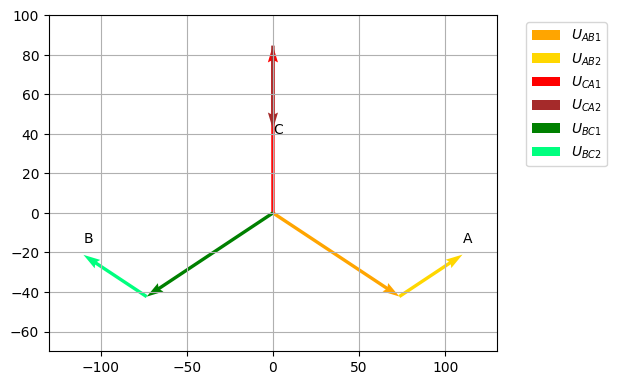

In [139]:
create_vector_diagram_no_text(Voltages_symmetric1)
create_vector_diagram_no_text(Voltages_symmetric2)
create_vector_diagram_no_text(Voltages_symmetric3)

plt.text(-110, -15, "B")
plt.text(110, -15, "A")
plt.text(0, 40, "C")


plt.tight_layout()
plt.legend()
plt.xlim(-130, 130)
plt.ylim(-70, 100)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Теперь проверим

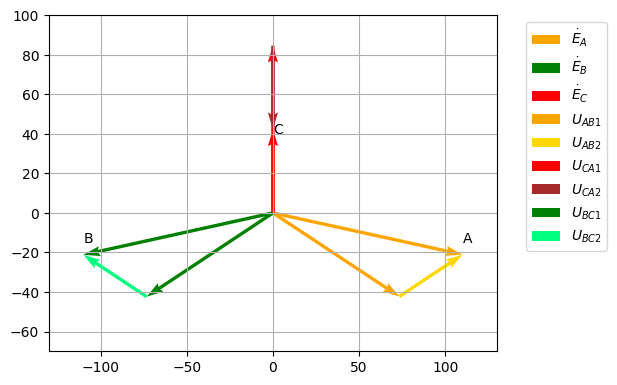

In [140]:
plt.quiver(0, 0, abs(E_A) * np.cos(np.angle(E_A)), abs(E_A) * np.sin(np.angle(E_A)),
                  angles='xy', scale_units='xy',  scale=1, color="orange", label="$\dot{E}_{A}$")
plt.quiver(0, 0, abs(E_B) * np.cos(np.angle(E_B)), abs(E_B) * np.sin(np.angle(E_B)),
                  angles='xy', scale_units='xy',  scale=1, color="green", label="$\dot{E}_{B}$")
plt.quiver(0, 0, abs(E_C) * np.cos(np.angle(E_C)), abs(E_C) * np.sin(np.angle(E_C)),
                  angles='xy', scale_units='xy',  scale=1, color="red", label="$\dot{E}_{C}$")


create_vector_diagram_no_text(Voltages_symmetric1)
create_vector_diagram_no_text(Voltages_symmetric2)
create_vector_diagram_no_text(Voltages_symmetric3)


plt.text(-110, -15, "B")
plt.text(110, -15, "A")
plt.text(0, 40, "C")


plt.tight_layout()
plt.legend()
plt.xlim(-130, 130)
plt.ylim(-70, 100)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Как видим всё совпало

Рассчитаем коэффициенты несимметрии \
$
k_{2U} = \dfrac{\dot{U}_{A2}}{\dot{U}_{A1}} \\
k_{0U} = \dfrac{\dot{U}_{A0}}{\dot{U}_{A1}} \\
$

In [141]:
print("$k_"'{2U}'" = " + str(f"{(U_A2/U_A1):.2f}") + "$")
print("$k_"'{0U}'" = " + str(f"{(U_A0/U_A1):.2f}") + "$")

$k_{2U} = 0.25+0.43j$
$k_{0U} = -0.00+0.00j$


$k_{2U} = 0.25+0.43j$ \
$k_{0U} = -0.00+0.00j$

# Задание 3

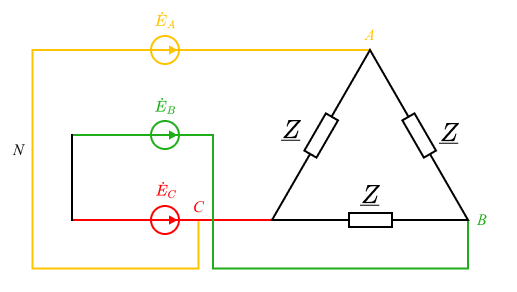

$
\dot{E}_{A} = 220 \\
\dot{E}_{B} = 220\underline{/-120^{\circ}} \\
\dot{E}_{C} = 220\underline{/120^{\circ}}
$

In [147]:
E_A = 220
E_B = 220*e**(-120j*np.pi/180)
E_C = 220*e**(120j*np.pi/180)
Z_ph1 = 3 + 9j

Построим, чтобы убедиться в корректности введённых значений

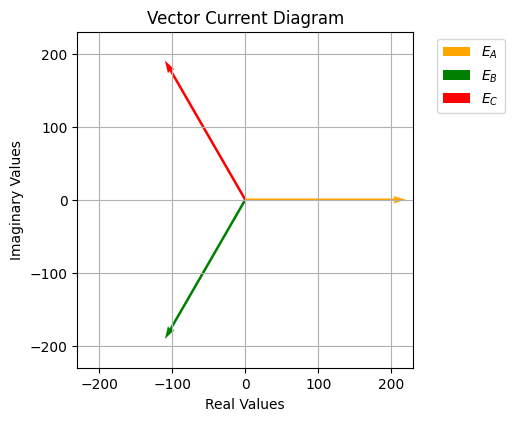

In [148]:
plt.quiver(0, 0, abs(E_A) *np.cos(np.angle(E_A)), abs(E_A) *np.sin(np.angle(E_A)), angles='xy', scale_units='xy', scale=1,
           color='orange',
           label='$E_A$')
plt.quiver(0, 0, abs(E_B) *np.cos(np.angle(E_B)), abs(E_B) *np.sin(np.angle(E_B)), angles='xy', scale_units='xy', scale=1,
           color='green',
           label='$E_B$')
plt.quiver(0, 0, abs(E_C) *np.cos(np.angle(E_C)), abs(E_C) *np.sin(np.angle(E_C)), angles='xy', scale_units='xy', scale=1,
           color='red',
           label='$E_C$')


plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Current Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-230, 230)
plt.ylim(-230, 230)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Пусть потенциал точки N равен нулю, следовательно потенциал точки C, тоже 0 \
$
\dot{\varphi}_{C} = 0
$ \
Тогда напишем потенциалы других точек \
$
\dot{\varphi}_{A} = \dot{E}_{A} \\
\dot{\varphi}_{B} = \dot{E}_{B} - \dot{E}_{C} \\
$

In [149]:
phi_A = E_A
phi_B = E_B - E_C
phi_C = 0

Найдём напряжения \
$
\dot{U}_{AB} = \dot{\varphi}_{A} - \dot{\varphi}_{B} \\
\dot{U}_{BC} = \dot{\varphi}_{B} - \dot{\varphi}_{C} \\
\dot{U}_{CA} = \dot{\varphi}_{C} - \dot{\varphi}_{A} \\
$

In [150]:
U_AB = phi_A - phi_B
U_BC = phi_B - phi_C
U_CA = phi_C - phi_A

In [151]:
Voltages_triangle3 = {
    '$\dot{U}_{BC}$': {'magnitude': abs(U_BC), 'angle': np.angle(U_BC), 'color': 'green'},
    '$\dot{U}_{AB}$': {'magnitude': abs(U_AB), 'angle': np.angle(U_AB), 'color': 'orange'},
    '$\dot{U}_{CA}$': {'magnitude': abs(U_CA), 'angle': np.angle(U_CA), 'color': 'red'},
}

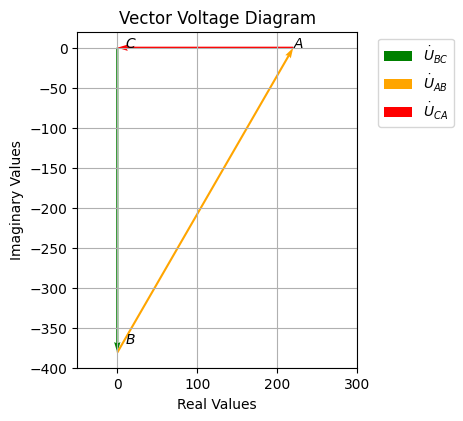

In [152]:
create_vector_diagram_no_text(Voltages_triangle3)

plt.text(220, 0, "$A$")
plt.text(10, 0, "$C$")
plt.text(10, -370, "$B$")


plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Voltage Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-50, 300)
plt.ylim(-400, 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Снова вспомним формулу

$
\dot{U}_{AB0} = \dfrac{1}{3}(\dot{U}_{AB} + \dot{U}_{BC} + \dot{U}_{CA}) \\
\dot{U}_{AB1} = \dfrac{1}{3}(\dot{U}_{AB} + a \cdot \dot{U}_{BC} + a^2 \cdot \dot{U}_{CA}) \\
\dot{U}_{AB2} = \dfrac{1}{3}(\dot{U}_{AB} + a^2 \cdot \dot{U}_{BC} + a \cdot \dot{U}_{CA}) \\
$

In [153]:
a = e**(120j*np.pi/180)
U_A0 = 1/3 * (U_AB + U_BC + U_CA)
U_A1 = 1/3 * (U_AB + a * U_BC + a**2 * U_CA)
U_A2 = 1/3 * (U_AB + a**2 * U_BC + a * U_CA)

In [154]:
print(U_A0) # равно нулю, так как сумма линейных равна нулю
print(U_A1)
print(U_A2)

0j
(220.00000000000003+254.03411844343532j)
(4.736951571734001e-15+127.01705922171769j)


Посмотрим, что получилось с учётом линейных множителей

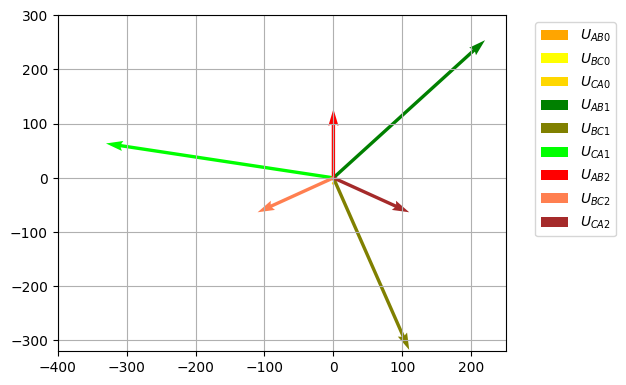

In [155]:
plt.quiver(0, 10, abs(U_A0) *np.cos(np.angle(U_A0)), abs(U_A0) *np.sin(np.angle(U_A0)), angles='xy', scale_units='xy', scale=1,
           color='orange',
           label='$U_{AB0}$')
plt.quiver(0, 0, abs(U_A0) *np.cos(np.angle(U_A0)), abs(U_A0) *np.sin(np.angle(U_A0)), angles='xy', scale_units='xy', scale=1,
           color='yellow',
           label='$U_{BC0}$')
plt.quiver(0, -10, abs(U_A0) *np.cos(np.angle(U_A0)), abs(U_A0) *np.sin(np.angle(U_A0)), angles='xy', scale_units='xy', scale=1,
           color='gold',
           label='$U_{CA0}$')


plt.quiver(0, 0, abs(U_A1) *np.cos(np.angle(U_A1)), abs(U_A1) *np.sin(np.angle(U_A1)), angles='xy', scale_units='xy', scale=1,
           color='green',
           label='$U_{AB1}$')
plt.quiver(0, 0, abs(U_A1) *np.cos(np.angle(U_A1*a**2)), abs(U_A1) *np.sin(np.angle(U_A1*a**2)), angles='xy', scale_units='xy', scale=1,
           color='olive',
           label='$U_{BC1}$')
plt.quiver(0, 0, abs(U_A1) *np.cos(np.angle(U_A1*a)), abs(U_A1) *np.sin(np.angle(U_A1*a)), angles='xy', scale_units='xy', scale=1,
           color='lime',
           label='$U_{CA1}$')



plt.quiver(0, 0, abs(U_A2) *np.cos(np.angle(U_A2)), abs(U_A2) *np.sin(np.angle(U_A2)), angles='xy', scale_units='xy', scale=1,
           color='red',
           label='$U_{AB2}$')
plt.quiver(0, 0, abs(U_A2) *np.cos(np.angle(U_A2*a)), abs(U_A2) *np.sin(np.angle(U_A2*a)), angles='xy', scale_units='xy', scale=1,
           color='coral',
           label='$U_{BC2}$')
plt.quiver(0, 0, abs(U_A2) *np.cos(np.angle(U_A2*a**2)), abs(U_A2) *np.sin(np.angle(U_A2*a**2)), angles='xy', scale_units='xy', scale=1,
           color='brown',
           label='$U_{CA2}$')


plt.tight_layout()
plt.legend()
plt.xlim(-400, 250) # предел по x откуда и до куда
plt.ylim(-320, 300) # предел по y
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Поворотные множители работают, видно прямую и обратную последовательности

Посчитаем напряжения, участвующие в построении

In [156]:
U_AB1 = U_A1
U_AB2 = U_A2
U_BC1 = U_A1*a**2
U_BC2 = U_A2*a
U_CA1 = U_A1*a
U_CA2 = U_A2*a**2

In [157]:
print("$k_"'{2U}'" = " + str(f"{(U_A2/U_A1):.2f}") + "$")
print("$k_"'{0U}'" = " + str(f"{(U_A0/U_A1):.2f}") + "$")

$k_{2U} = 0.29+0.25j$
$k_{0U} = 0.00+0.00j$


In [158]:
print(format_complex_exp(U_AB1))
print(format_complex_exp(U_AB2))

print(format_complex_exp(U_BC1))
print(format_complex_exp(U_BC2))

print(format_complex_exp(U_CA1))
print(format_complex_exp(U_CA2))

336.0555509634 * e^(49.11)
127.0170592217 * e^(90.00)
336.0555509634 * e^(-70.89)
127.0170592217 * e^(-150.00)
336.0555509634 * e^(169.11)
127.0170592217 * e^(-30.00)


Теперь приступим к построению \
Поскольку $U_{A0} \approx 0$, то не будем его указывать вовсе

In [159]:
Voltages_symmetric = {
    '$U_{BC1}$': {'magnitude': abs(U_BC1), 'angle': np.angle(U_BC1), 'color': 'green'},
    '$U_{BC2}$': {'magnitude': abs(U_BC2), 'angle': np.angle(U_BC2), 'color': 'springgreen'},
    '$U_{AB1}$': {'magnitude': abs(U_AB1), 'angle': np.angle(U_AB1), 'color': 'orange'},
    '$U_{AB2}$': {'magnitude': abs(U_AB2), 'angle': np.angle(U_AB2), 'color': 'gold'},
    '$U_{CA1}$': {'magnitude': abs(U_CA1), 'angle': np.angle(U_CA1), 'color': 'red'},
    '$U_{CA2}$': {'magnitude': abs(U_CA2), 'angle': np.angle(U_CA2), 'color': 'brown'},
}

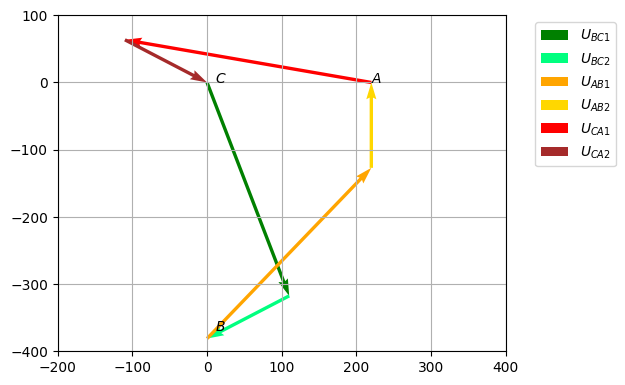

In [160]:
create_vector_diagram_no_text(Voltages_symmetric)

plt.text(220, 0, "$A$")
plt.text(10, 0, "$C$")
plt.text(10, -370, "$B$")


plt.tight_layout()
plt.legend()
plt.xlim(-200, 400)
plt.ylim(-400, 100)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Теперь построим ещё и линейные напряжения, чтобы проверить сходится или нет

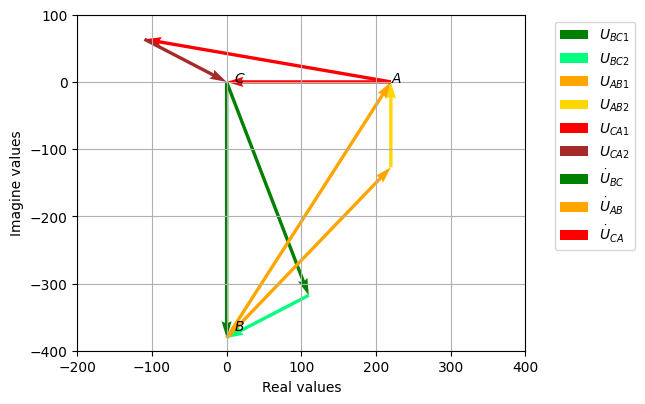

In [161]:
create_vector_diagram_no_text(Voltages_symmetric)
create_vector_diagram_no_text(Voltages_triangle3)

plt.text(220, 0, "$A$")
plt.text(10, 0, "$C$")
plt.text(10, -370, "$B$")


plt.tight_layout()
plt.legend()
plt.xlim(-200, 400)
plt.ylim(-400, 100)
plt.grid()
plt.xlabel("Real values")
plt.ylabel("Imagine values")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Найдём токи на элементах \
$
\dot{I}_{AB} = \dfrac{\dot{U}_{AB}}{\underline{Z_{ph1}}} \\
\dot{I}_{BC} = \dfrac{\dot{U}_{AC}}{\underline{Z_{ph1}}} \\
\dot{I}_{CA} = \dfrac{\dot{U}_{CA}}{\underline{Z_{ph1}}} \\
$

In [162]:
I_AB = U_AB/Z_ph1
I_BC = U_BC/Z_ph1
I_CA = U_CA/Z_ph1

По первому закону Кирхгофа найдём токи в ветвях \
$
\dot{I}_{A} = \dot{I}_{AB} - \dot{I}_{CA} \\
\dot{I}_{B} = \dot{I}_{BC} - \dot{I}_{AB} \\
\dot{I}_{C} = \dot{I}_{CA} - \dot{I}_{BC}
$

In [163]:
I_A = I_AB - I_CA
I_B = I_BC - I_AB
I_C = I_CA - I_BC

In [164]:
"""
Power_calculation() calculates power as real and imaginary parts of multiplications voltage on conjuncted circuit
"""

def Power_calculation(V, I):
    S = V * np.conj(I)
    P = S.real
    Q = S.imag
    return P, Q

In [165]:
U_AN = -U_CA
U_BN = U_BC
U_CN = 0

In [166]:
P_A, Q_A = Power_calculation(U_AN, I_A)
P_B, Q_B = Power_calculation(U_BN, I_B)
P_C, Q_C = Power_calculation(U_CN, I_C)

P_AB, Q_AB = Power_calculation(U_AB, I_AB)
P_BC, Q_BC = Power_calculation(U_BC, I_BC)
P_CA, Q_CA = Power_calculation(U_CA, I_CA)

Активная мощность

In [167]:
print(P_A + P_B + P_C)
print(P_AB + P_BC + P_CA)

12906.666666666666
12906.666666666666


Реактивная мощность

In [168]:
print(Q_A + Q_B + Q_C)
print(Q_AB + Q_BC + Q_CA)

38720.00000000001
38720.0


Балансы мощности совпали с высокой точностью

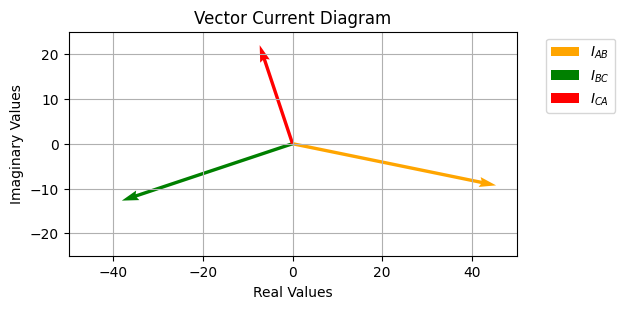

In [169]:
plt.quiver(0, 0, abs(I_AB) * np.cos(np.angle(I_AB)), abs(I_AB) * np.sin(np.angle(I_AB)),
           angles='xy', scale_units='xy',  scale=1, color="orange", label="$I_{AB}$")
plt.quiver(0, 0, abs(I_BC) * np.cos(np.angle(I_BC)), abs(I_BC) * np.sin(np.angle(I_BC)),
           angles='xy', scale_units='xy',  scale=1, color="green", label="$I_{BC}$")
plt.quiver(0, 0, abs(I_CA) * np.cos(np.angle(I_CA)), abs(I_CA) * np.sin(np.angle(I_CA)),
           angles='xy', scale_units='xy',  scale=1, color="red", label="$I_{CA}$")


#plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Current Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-50, 50)
plt.ylim(-25, 25)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

$
\dot{I}_{0} = \dfrac{1}{3}(\dot{I}_A + \dot{I}_B + \dot{I}_C) \\
\dot{I}_{1} = \dfrac{1}{3}(\dot{I}_A + a \cdot \dot{I}_B + a^2 \cdot \dot{I}_C) \\
\dot{I}_{2} = \dfrac{1}{3}(\dot{I}_A + a^2 \cdot \dot{I}_B + a \cdot \dot{I}_C) \\
$

In [170]:
a = e**(120j*np.pi/180)
I_A0 = 1/3 * (I_AB +        I_BC +        I_CA)
I_A1 = 1/3 * (I_AB + a *    I_BC + a**2 * I_CA)
I_A2 = 1/3 * (I_AB + a**2 * I_BC + a *    I_CA)

Воспользуемся формулой: \
$
\dot{I}_{A} = \dot{I}_{0} + \dot{I}_{1} + \dot{I}_{2} \\
\dot{I}_{B} = \dot{I}_{0} + a^2 \cdot \dot{I}_{1} + a \cdot \dot{I}_{2} \\
\dot{I}_{C} = \dot{I}_{0} + a \cdot \dot{I}_{1} + a^{2} \cdot \dot{I}_{2} \\
$

Построим графически, чтобы проверить

In [171]:
Currents_input2A = {
    '$I_{A0}$': {'magnitude': abs(I_A0), 'angle': np.angle(I_A0), 'color': 'darkorange'},
    '$I_{A1}$': {'magnitude': abs(I_A1), 'angle': np.angle(I_A1), 'color': 'bisque'},
    '$I_{A2}$': {'magnitude': abs(I_A2), 'angle': np.angle(I_A2), 'color': 'gold'},
}

Currents_input2B = {
    '$I_{B0}$': {'magnitude': abs(I_A0), 'angle': np.angle(I_A0), 'color': 'darkgreen'},
    '$I_{B1}$': {'magnitude': abs(I_A1), 'angle': np.angle(I_A1*a**2), 'color': 'springgreen'},
    '$I_{B2}$': {'magnitude': abs(I_A2), 'angle': np.angle(I_A2*a), 'color': 'lime'},
}

Currents_input2C = {
    '$I_{A0}$': {'magnitude': abs(I_A0), 'angle': np.angle(I_A0), 'color': 'brown'},
    '$I_{A1}$': {'magnitude': abs(I_A1), 'angle': np.angle(I_A1*a), 'color': 'darkred'},
    '$I_{A2}$': {'magnitude': abs(I_A2), 'angle': np.angle(I_A2*a**2), 'color': 'coral'},
}

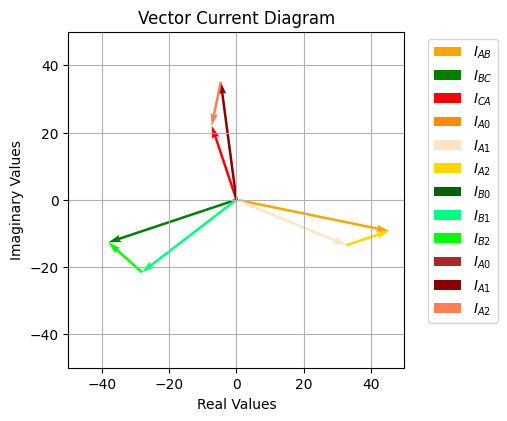

In [172]:
plt.quiver(0, 0, abs(I_AB) * np.cos(np.angle(I_AB)), abs(I_AB) * np.sin(np.angle(I_AB)),
           angles='xy', scale_units='xy',  scale=1, color="orange", label="$I_{AB}$")
plt.quiver(0, 0, abs(I_BC) * np.cos(np.angle(I_BC)), abs(I_BC) * np.sin(np.angle(I_BC)),
           angles='xy', scale_units='xy',  scale=1, color="green", label="$I_{BC}$")
plt.quiver(0, 0, abs(I_CA) * np.cos(np.angle(I_CA)), abs(I_CA) * np.sin(np.angle(I_CA)),
           angles='xy', scale_units='xy',  scale=1, color="red", label="$I_{CA}$")

create_vector_diagram_no_text(Currents_input2A)
create_vector_diagram_no_text(Currents_input2B)
create_vector_diagram_no_text(Currents_input2C)


#plt.tight_layout()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

plt.title("Vector Current Diagram")
plt.xlabel("Real Values")
plt.ylabel("Imaginary Values")

plt.xlim(-50, 50)
plt.ylim(-50, 50)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

Поскольку все три тока имеют одинаковые токи в нулевой последовательности, то на схеме они наложились, но мы видим, что они все видны

Рассчитаем коэффициенты несимметрии \
$
k_{2I} = \dfrac{\dot{I}_{2}}{\dot{I}_{1}} \\
k_{0I} = \dfrac{\dot{I}_{0}}{\dot{I}_{1}} \\
$

In [173]:
print("$k_"'{2I}'" = " + str(f"{(I_A2/I_A1):.2f}") + "$")
print("$k_"'{0I}'" = " + str(f"{(I_A0/I_A1):.2f}") + "$")

$k_{2I} = 0.29+0.25j$
$k_{0I} = -0.00-0.00j$


$k_{2I} = 0.29+0.25j$ \
$k_{0I} = -0.00-0.00j$

Коэффициенты несимметрии токов и напряжений совпали